In [2]:
#Importation des bibliothèques colab
from google.colab import drive

In [3]:
drive.mount('/gdrive/')

Mounted at /gdrive/


In [4]:
#Importation des bibliothèques
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.cluster import KMeans
from pandas.plotting import table
from google.colab import files



In [ ]:
#Installation de modules

In [7]:
!pip install colorama

In [6]:
pip install dataframe_image

     |████████████████████████████████| 1.3MB 12.1MB/s 
     |████████████████████████████████| 296kB 41.5MB/s 
     |████████████████████████████████| 143kB 44.5MB/s 


In [8]:
from colorama import Fore
import dataframe_image as dfi

In [9]:
# Récupération des données
data = pd.read_csv('/gdrive/My Drive/Data/dataP3.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
# Nettoyage des 'espace' inutiles
data.columns = data.columns.str.strip()

In [ ]:
data.head(1)

code      product_name  ... sodium_100g nutrition_score_fr_100g
0  0000000000017  Vitória crackers  ...        0.56                     NaN

[1 rows x 27 columns]

# Exploration des données

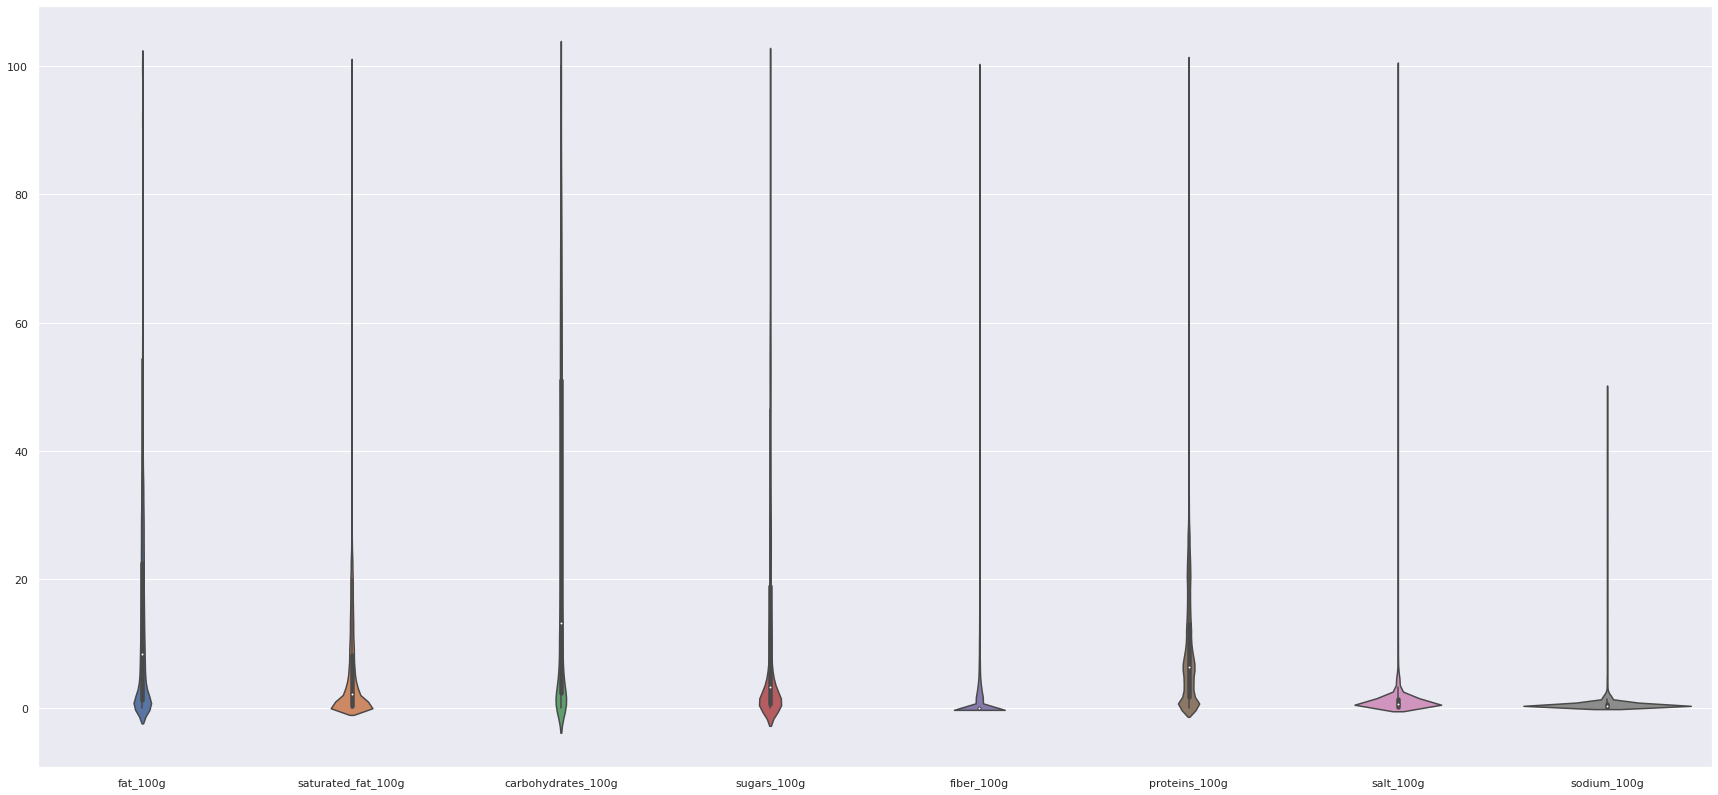

In [ ]:
# Diagramme en violon
sns.set(rc={"figure.figsize":(30, 14)})
sns.violinplot(data=data[data.columns[range(18,26)]],scale='area')

Zoom sur l'intervalle y = 0-10g

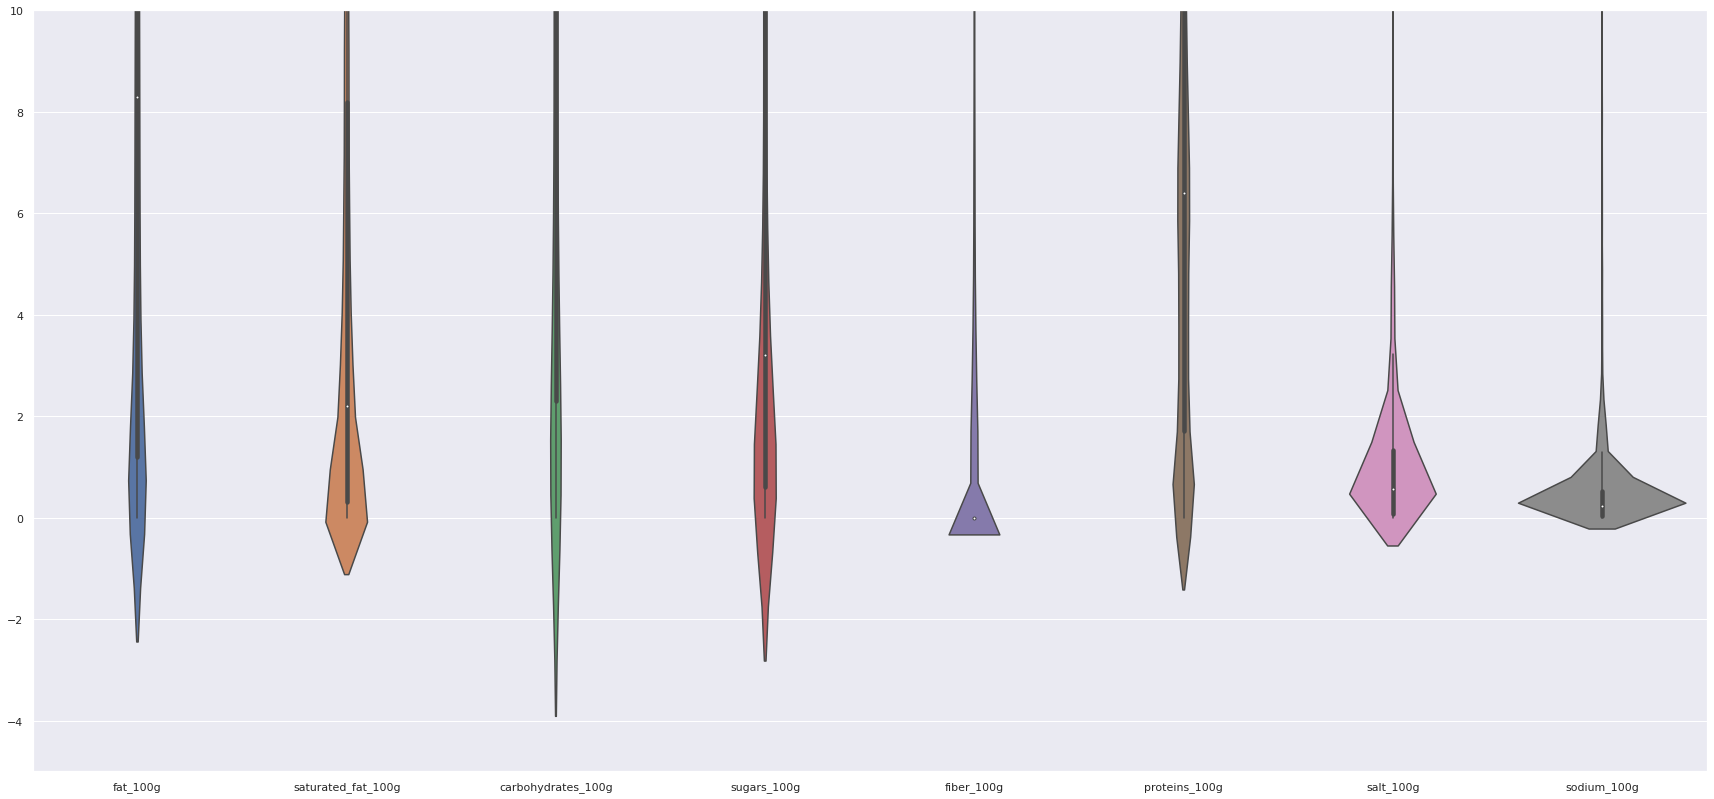

In [ ]:
plt.ylim(-5, 10)
sns.violinplot(data=data[data.columns[range(18,26)]],scale='area')

# Analyse univariée


In [15]:
# Variables à étudier
indicatorList = data.columns[range(16,27)]

# Initialisation du tableau 'stats' contenant les mesures statistiques
stats = pd.DataFrame()

# Boucle itérative pour le calcul des mesures statistiques classiques pour chaque indicateur
for indicator in indicatorList :
    # Création d'un dictionnaire pour créer et ajouter une ligne contenant les mesures statistiques de l'indicateur 
    # dans le tableau stats
    newRow = dict()
    newRow['Indicator']=indicator
    newRow['Mean']= round(data[indicator].mean(),3)
    newRow['Median']= round(data[indicator].median(),3)
    newRow['Variance']= round(data[indicator].var(),3)
    newRow['Standard Deviation']= round(data[indicator].std(),3)
    newRow['Kurtosis']= round(data[indicator].kurtosis(),3)
    newRow['Skewness']= round(data[indicator].skew(),3)
    # Ajout de la ligne au tableau stats
    stats = stats.append(newRow, ignore_index=True)

#Affichage
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(stats)


                  Indicator  Kurtosis      Mean    Median  Skewness  \
0          energy_kcal_100g     0.050   276.468   266.000     0.548   
1               energy_100g     0.042  1151.385  1100.000     0.553   
2                  fat_100g     6.070    14.261     8.300     2.100   
3        saturated_fat_100g    18.547     5.511     2.200     3.071   
4        carbohydrates_100g    -0.784    26.497    13.200     0.758   
5               sugars_100g     2.682    13.440     3.200     1.810   
6                fiber_100g   250.479     0.590     0.000    11.475   
7             proteins_100g    12.663     9.127     6.400     2.609   
8                 salt_100g   337.197     1.216     0.575    16.132   
9               sodium_100g   337.681     0.487     0.230    16.143   
10  nutrition_score_fr_100g    -0.940     9.501    11.000     0.083   

    Standard Deviation    Variance  
0              185.935   34571.676  
1              775.782  601837.568  
2               17.189     295.474  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

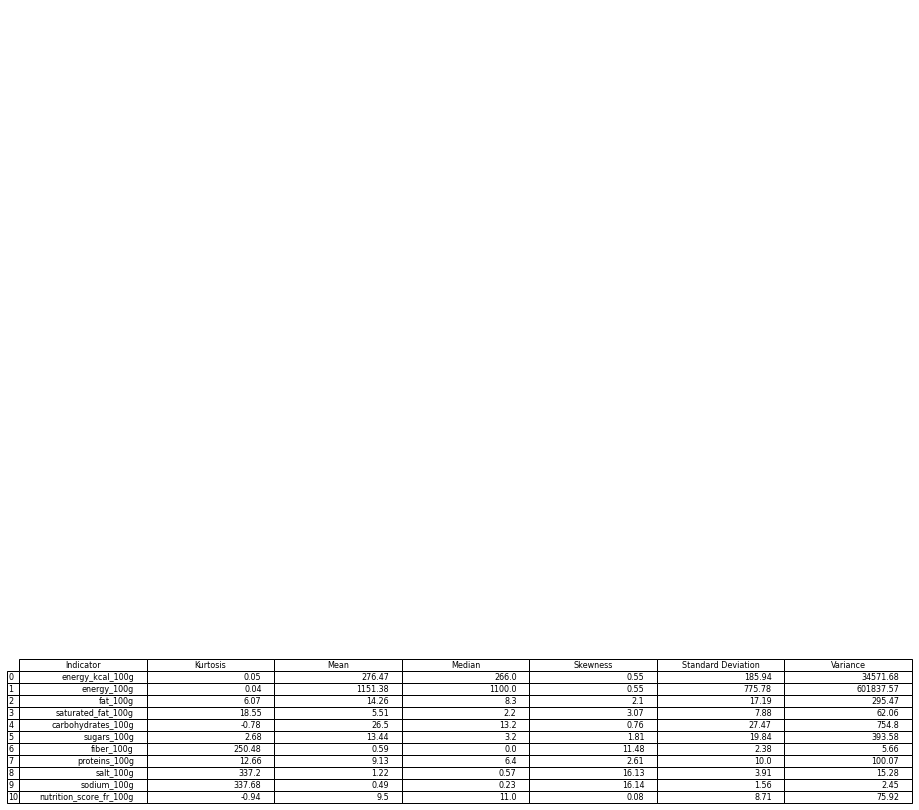

In [17]:
# Affichage sous forme de tableau à télécharger
plt.figure(figsize=(16,12))
plt.tight_layout()
# Pas d'axes
ax = plt.subplot(111, frame_on=False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
#Création du tableau
table(ax, stats.round(decimals=2))
#Sauvegarde
plt.savefig('statsTable.png', bbox_inches = 'tight')
#Téléchargement
files.download('statsTable.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

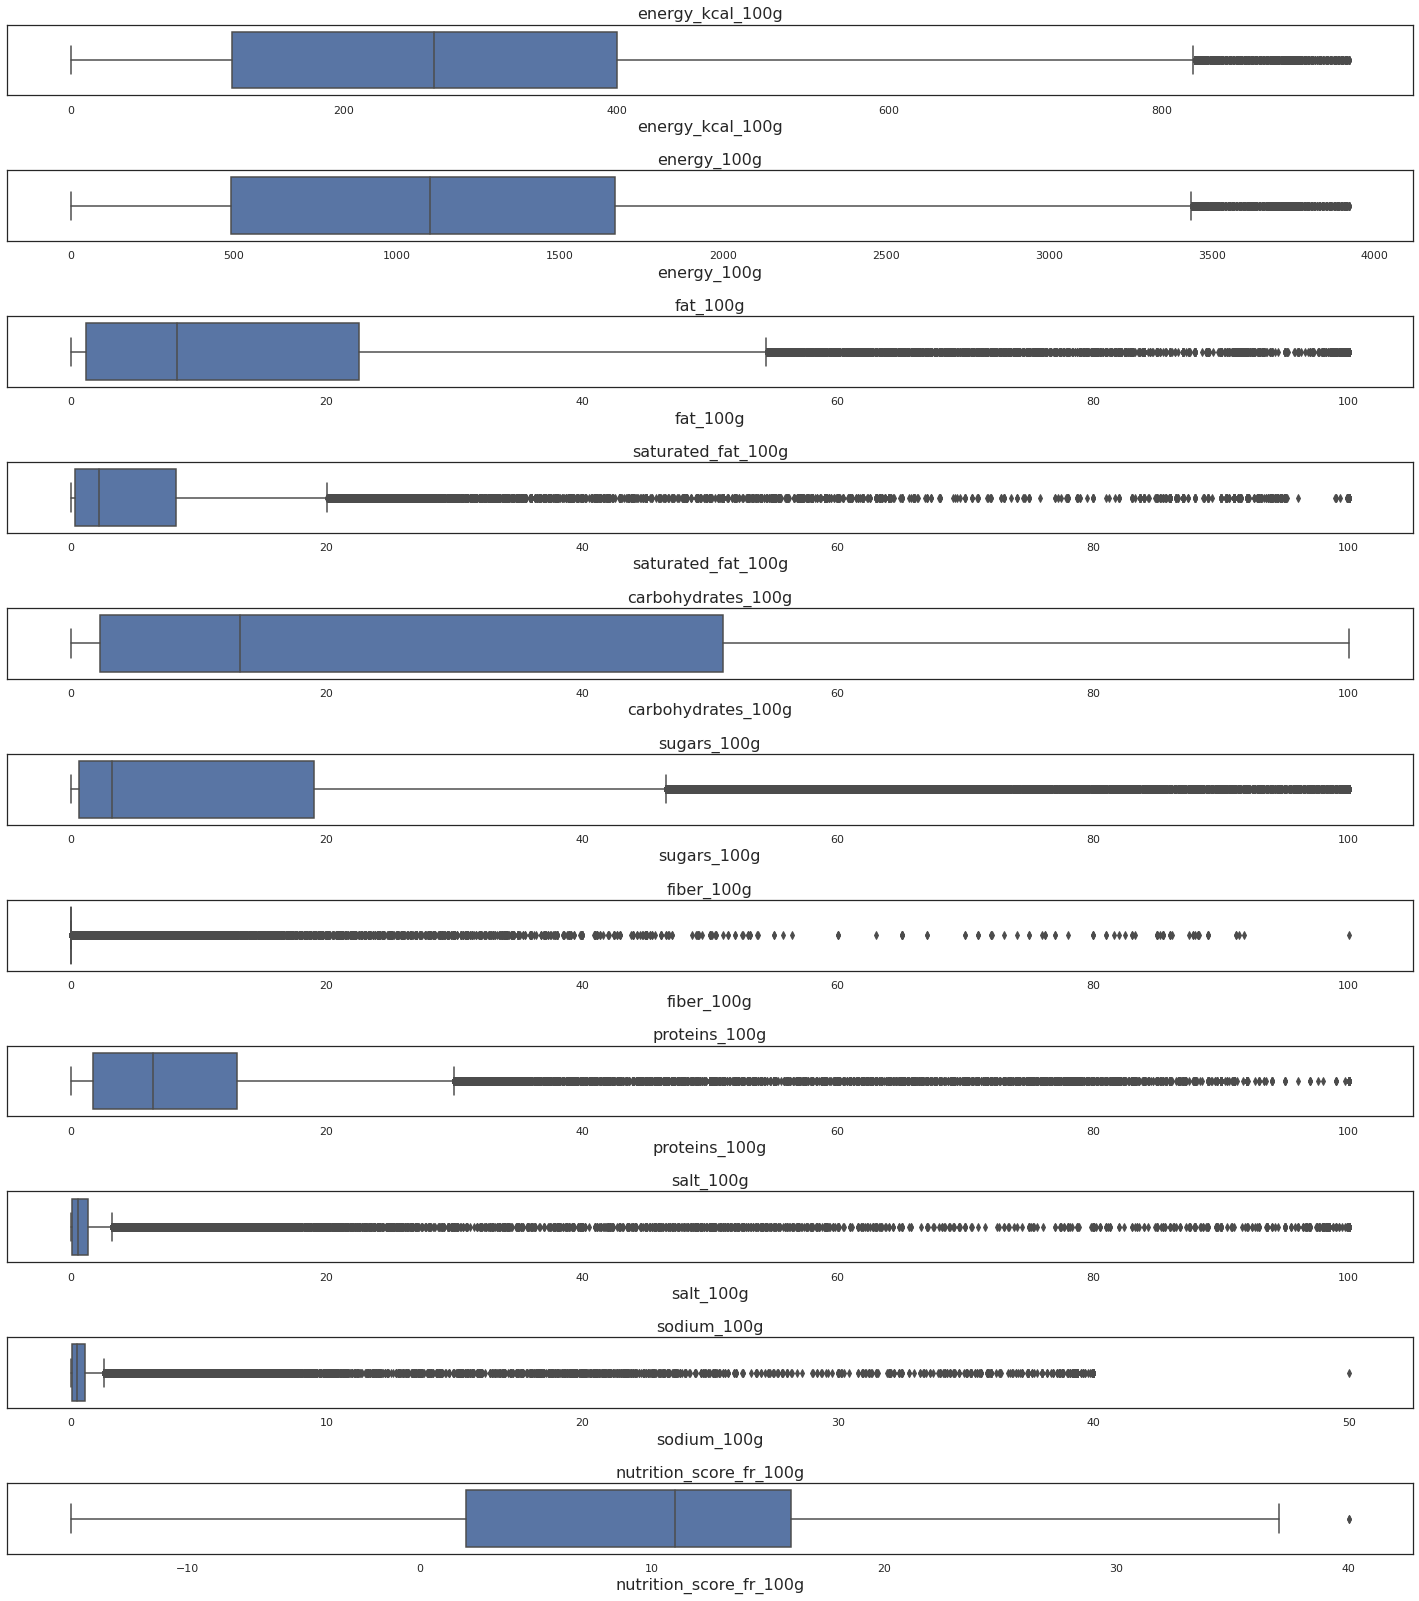

In [ ]:
# Graphiques boxplot de chaque variable
plt.figure(figsize=(20,24))
sns.set({"font.size":16,"axes.titlesize":16,"axes.labelsize":16}, style='white')

# Initialisation de la position du graphique
i=1

# Boucle permettant de créer un graphique par indicateur
for indicator in indicatorList :
    # On isole les donnéees de chaque variable dans un df à chaque intéraion
    #indicatorData = data[data['Indicator Code'].str.contains(indicatorCode)]
    # Emplacement itératif du graphique
    plt.subplot(12,1,i)
    sns.boxplot(x=data[indicator], orient='h')
    plt.title(indicator)
    plt.tight_layout()
    # Incrémentation de la position
    i+=1

# Sauvegarde des graphiques
plt.savefig('boxPlots.png')
#Téléchargement
files.download('boxPlots.png')


### Ensemble des indicateurs
Tous les indicateurs prennent la plage totale possible avec des valeurs de 0 à 100 pour les teneurs/100g, des valeurs de 0 à 900 pour l'énergie en kCal et de 0 à environ 3900 pour l'énergie en kJ. C'est assez logique puisque les aliments enregistrés peuvent contenir de l'eau en bouteille (presque zéro à toutes les valeurs) jusqu'à un paquet de sel ou une bouteille d'huile, des aliments constitués à 100% d'un seul type d'élément.

### Sel et Sodium
L'indicateur de teneur en sel présente un kurtosis est très élevé ce qui montre une grande concentration de valeurs autour de la moyenne, en effet la très grande majorité des aliments possèdent moins de quelques grammes de sel. Ce coefficient se retrouve sur l'écart interquartile très faible visible sur le diagramme boxplot: la boîte est très petite.

Du fait de ses valeurs très concentrées près de la valeur minimale (0) et sa valeur pouvant aller jusqu'à 100g/100g, il est logique de constater un skew positif élevé comparativement aux autres teneurs. De même ce skew positif se retrouve dans la relation moyenne > médiane.

En termes de variance, on a l'une des plus faible du groupe étudié, mais de nouveau, c'est logique vu le kurtosis élevé.

Le sel et le sodium présentent des valeurs quasi identiques de Skewness et de Kurtosis mais des valeurs différentes de moyenne, de médiane et de variance, cela peut suggérer que leur distributions sont de même forme et qu'il n'y a qu'un facteur multiplicateur entre les deux. Il y aurait alors une très forte corrélation ou une multicolinéarité.

### Glucides
Ce sont les nutriments dont la teneur présente la variance la plus grande en comparaison avec son intervalle maximum et le nutriment que l'on retrouve en plus grande quantité.

### Fibres
Son diagramme est ramassé sur 0 ce qui signifie qu'au mois les 3/4 des produits étudiés n'en contiennent pas. C'est de loin le nutriment le plus rare.

###Energie kCal et kJ
Constatation similaire au rapport Sel/Sodium, mais ici, on sait que ces deux distributions devrait avoir une forme identique (si on écarte l'influence de la répartition des valeurs manquantes) et on constate bien des valeurs quasi identiques de skewness et de kurtosis.

# Concept d'application

L'application veut tirer parti de l'efficacité du concept de gamification pour créer des incitations directes aidant l'utilisateur à atteindre des objectifs qu'il s'est lui même fixé. (Gamification : introduction d'éléments de jeu dans des activités non ludiques ex : scoring, récompenses, classement, etc...)

Concrêtement, pendant une première phase, l'utilisateur scanne les aliments qu'il consomme et enregistre ses sessions d'activités sportives (intensité et durée), à l'issue de cette première phase (1 semaine ? 1 mois ?) l'application lui délivre un score faisant état de la qualité générale de son alimentation et de son entretien physique. Le but étant de s'améliorer, ce score n'a pour but que d'être le point de référence de sa progression.

A partir de ce constat, l'utilisateur peut se fixer un objectif d'hygiène de vie et l'application, au travers des informations que l'utilisateur lui renvoie, va pouvoir lui rendre compte de sa progression vers son objectif, tout en lui attribuant des récompenses virtuelles pour sa progression, son assiduité, sa constance, etc... On parle ici de badges, titres, avatars utilisables dans la sphère sociale de l'application, en effet, elle encourage l'utilisateur à partager ses progrès avec ses amis pour se motiver.

L'un des points importants est que le score absolu n'existe pas et ne permet donc pas de se comparer, de juger ou de discriminer, seule la progression est miose en valeur.

A long terme, l'un des buts est d'utiliser l'application pour adapter les critères de classification des aliments à chaque individu en fonction de leur âge, la fréquence de leurs activité sportive ou d'autres critères.


# Analyse multivariée

Hypothèses analyse :
- Le sel ou chlorure de sodium est composé composé à 40% de sodium, c'est une réalité scientifique qui nous vient de la chimie, mais le total de sodium trouvé dans les aliments provient-il entièrement du sel ? Si oui, on peut ignorer une de ces deux variables pour simplifier l'étude

Pour que l'application fonctionne, elle doit être capable dans une certaine mesure de prédire un score nutritionnel d'aliments qui ne seraient pas dans la base de données, à partir des nutriments ce n'est pas un problème, la classification se basant sur les nutriments. Mais en l'absence de ces nutriments : à partir d'autres scores ou caractéristiques qualitatives, peut-on induire un semblant de score ?

- Les produits à écoscore élevé ont un nutriscore élevé

- Les produits transformés sont moins bons pour la santé (NOVA group vs nutriscore, sel, sucre, gras) car ils sont plus sucrés, gras et salés.

- Quelles familles de produits ont le nutriscore le moins élevé ?






##Sel et sodium

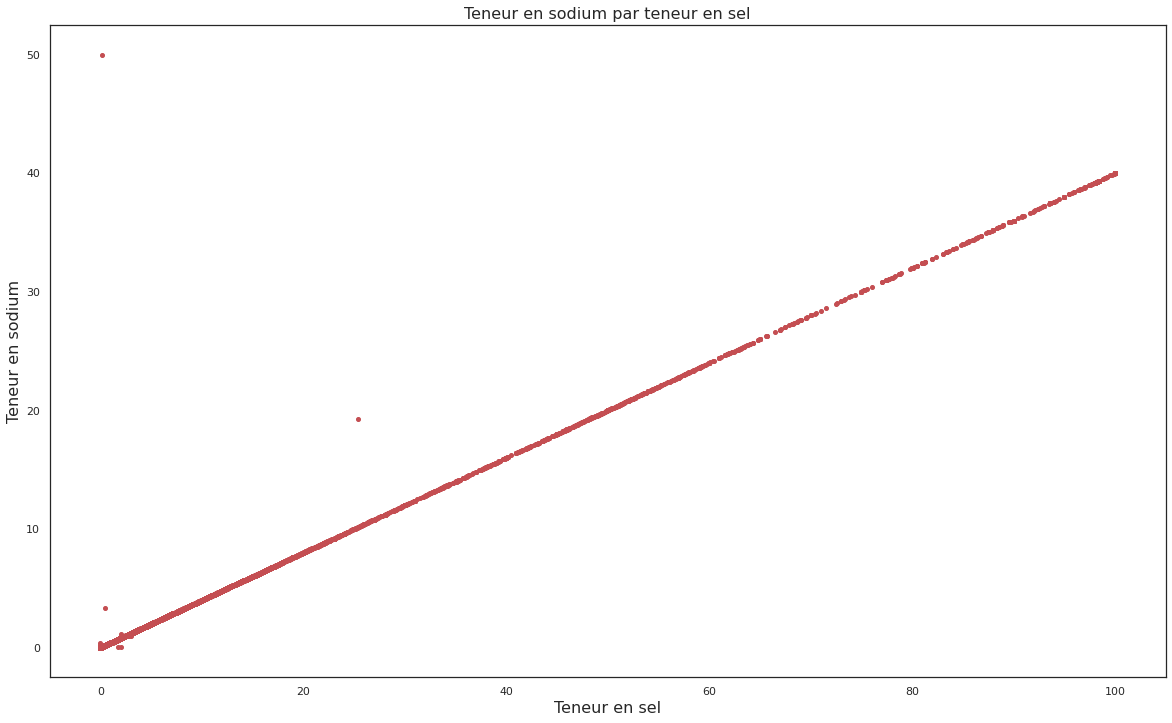

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 2160x1008 with 0 Axes>

In [ ]:
# Graphique
plt.figure(figsize=(20,12))
plt.plot(data['salt_100g'], data['sodium_100g'], 'ro', markersize=4)
plt.title('Teneur en sodium par teneur en sel')
plt.xlabel('Teneur en sel')
plt.ylabel('Teneur en sodium')
plt.show()
# Sauvegarde du graphique
plt.savefig('saltSodium.png')
#Téléchargement
files.download('saltSodium.png')

On peut constater ici une corrélation très forte entre les deux nutriments qui correspond bien au rapport de masse entre le sel et le sodium défini par la chimie.

Concernant les outliers, ils ne sont par forcément dû à des erreurs de saisie : on en distingue deux sortes, ceux situés près de 0 qui peuvent être dûs à des problèmes d'arrondis, ceux situés bien au-dessus de la ligne et qui peuvent représenter des aliments intégrant une autre source de sodium que le sel (ex : bicarbonate de soude)

Conclusion : pour l'écrasante grande majorité des aliments, le sodium provient du sel et une corrélation très forte lie ces deux nutriments, nous avons donc ici deux variables multicolinéaires, à l'avenir nous pourrons donc en écarter une de nos études puisqu'elle n'apportera pas plus d'information que la première et peut perturber certains outils d'analyse multivariée.

## Relation entre Ecoscore et Nutriscore

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


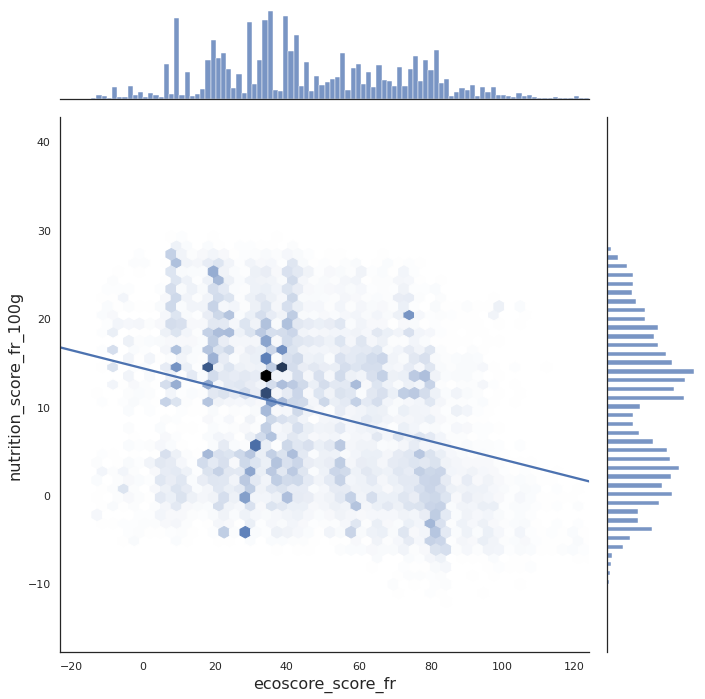

In [ ]:
# Graphique
graph = sns.jointplot(x=data['ecoscore_score_fr'], y=data['nutrition_score_fr_100g'],kind="hex", height=10)

# Regression linéaire
sns.regplot(x=data['ecoscore_score_fr'], y=data['nutrition_score_fr_100g'], scatter=False, ax=graph.ax_joint) 

La répartition des données ne permet pas d'observer de lien flagrant entre les deux scores, en demandant une regression linéaire, on observe cependant une corrélation négative entre les scores écologiques et nutritionnels. Un nutriscore faible correspond à un aliment plus sain. On trouve donc bien que meilleur l'écoscore d'un produit est, meilleur son nutriscore sera.

## Lien entre le niveau de transformation et la qualité nutritionnelle

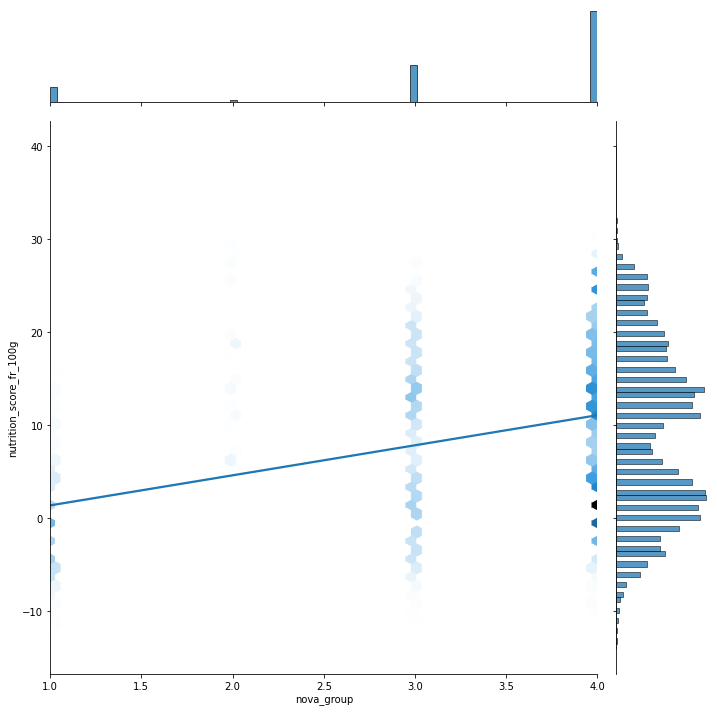

In [ ]:
# Graphique
graph = sns.jointplot(x=data['nova_group'], y=data['nutrition_score_fr_100g'],kind="hex", height=10)

# Regression linéaire
sns.regplot(x=data['nova_group'], y=data['nutrition_score_fr_100g'], scatter=False, ax=graph.ax_joint) 

Etant donné que plus le nutriscore d'un produit est élevé moins il est sain, le calcul montre bien que plus un aliment est transformé, moins il est sain. Cependant on peut se demander si cette tendance n'est pas uniquement dûe aux très bons scores des aliments de catégorie 1.

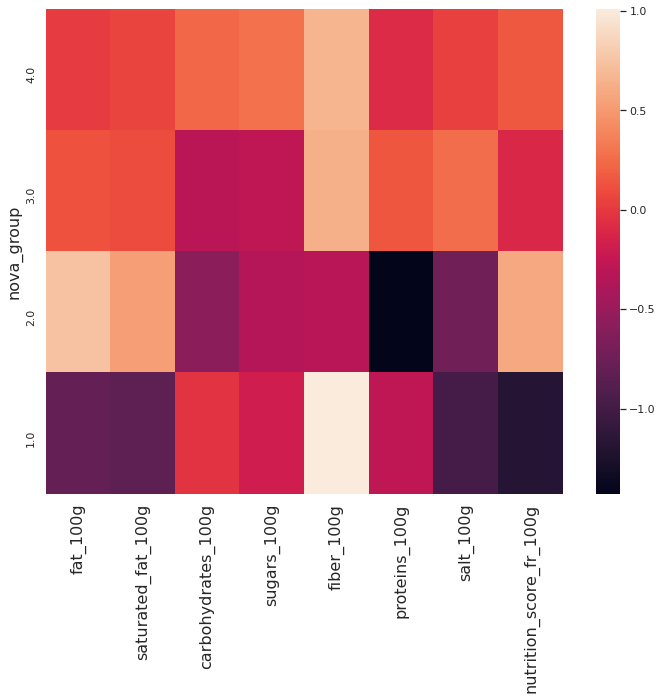

In [ ]:
heatmap = plt.figure(1, figsize=(10, 10))
indicatorListHeatmap = indicatorList.to_list()
indicatorListHeatmap.remove('energy_kcal_100g')
indicatorListHeatmap.remove('energy_100g')

# On retire le sodium, multicolinéaire au sel
indicatorListHeatmap.remove('sodium_100g')

# Transformation de Yeo-Johnson et intégration dans un DF
dataScaled = preprocessing.PowerTransformer(method = 'yeo-johnson').fit_transform(data[indicatorListHeatmap])
dataScaled = pd.DataFrame(dataScaled, columns=indicatorListHeatmap)
dataScaledNovaGroups = data['nova_group'].to_frame()
dataScaledNovaGroups = dataScaledNovaGroups.merge(dataScaled, how='inner', left_index=True, right_index=True)

# Regroupement par groupe pnns
dataScaledNovaGroups= dataScaledNovaGroups.groupby(by='nova_group').mean().sort_values(by='nova_group',ascending=False)
heatmap = sns.heatmap(dataScaledNovaGroups)
heatmap.set_xticklabels(indicatorListHeatmap, fontsize = 16)
plt.tight_layout()
#Sauvegarde, téléchargement et affichage
plt.savefig('heatMapNova.png')
files.download('heatMapNova.png')
plt.show()

Difficile de comparer les catégories nova, en effet, le groupe 2 par exemple est essentiellement composé d'ingrédients culinaires qui sont généralement des ingrédients pour d'autres préparations (sucre, huiles)

Cependant on peut noter que les aliments ultra transformés sont globalement moins sains que des aliments transformés de façon assez simple (catégorie 3), ces derniers contiennent en effet beaucoup moins de sucre.

Les aliments ultra transformés sont surtout remarquable par le fait qu'ils contiennet beaucoup plus de sucre que les autres catégories.

## Nutriscore et répartition des nutriments par famille de produits

In [ ]:
data.head(1)

code      product_name quantity categories categories_tags  \
0  0000000000017  Vitória crackers      NaN        NaN             NaN   

   additives_n  ingredients_from_palm_oil_n  \
0          NaN                          NaN   

   ingredients_that_may_be_from_palm_oil_n  nutriscore_score nutriscore_grade  \
0                                      NaN               NaN              NaN   

   nova_group pnns_groups_1 pnns_groups_2  ecoscore_score_fr  \
0         NaN       unknown       unknown                NaN   

  ecoscore_grade_fr main_category  energy_kcal_100g  energy_100g  fat_100g  \
0               NaN           NaN             375.0       1569.0       7.0   

   saturated_fat_100g  carbohydrates_100g  sugars_100g  fiber_100g  \
0                3.08                70.1         15.0         0.0   

   proteins_100g  salt_100g  sodium_100g  nutrition_score_fr_100g  
0            7.8        1.4         0.56                      NaN

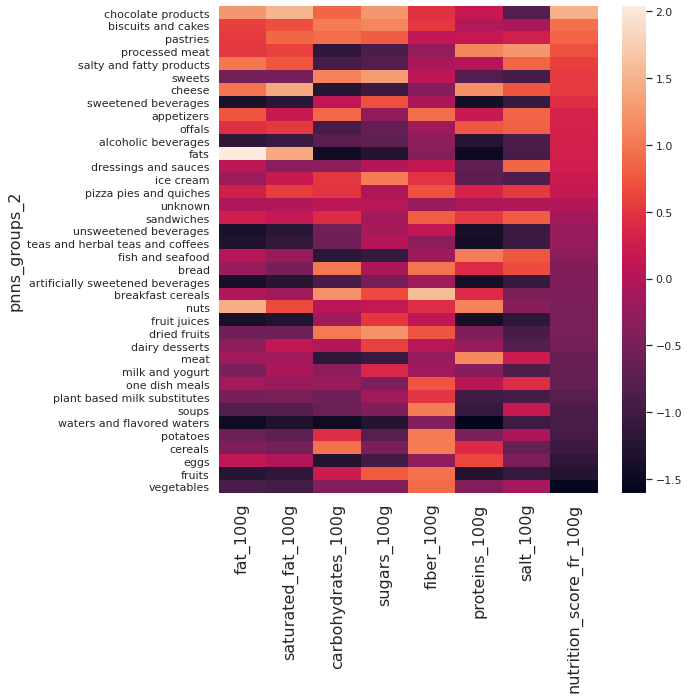

In [ ]:
heatmap = plt.figure(1, figsize=(10, 10))
#Variables à retenir pour le graphique
indicatorListHeatmap = indicatorList.to_list()
indicatorListHeatmap.remove('energy_kcal_100g')
indicatorListHeatmap.remove('energy_100g')

# On retire le sodium, multicolinéaire au sel
indicatorListHeatmap.remove('sodium_100g')

# Transformation de Yeo-Johnson et intégration dans un DF
dataScaled = preprocessing.PowerTransformer(method = 'yeo-johnson').fit_transform(data[indicatorListHeatmap])
dataScaled = pd.DataFrame(dataScaled, columns=indicatorListHeatmap)
dataScaledPnnsGroups = data['pnns_groups_2'].to_frame()
dataScaledPnnsGroups = dataScaledPnnsGroups.merge(dataScaled, how='inner', left_index=True, right_index=True)

# Regroupement par groupe pnns
dataScaledPnnsGroups= dataScaledPnnsGroups.groupby(by='pnns_groups_2').mean().sort_values(by='nutrition_score_fr_100g',ascending=False)

#Graphique
heatmap = sns.heatmap(dataScaledPnnsGroups)
heatmap.set_xticklabels(indicatorListHeatmap, fontsize = 16)
plt.tight_layout()
#Sauvegarde, téléchargement et affichage
plt.savefig('heatMapPnns.png')
files.download('heatMapPnns.png')
plt.show()

A partir des groupes d'aliments,  on peut voir que le nutriscore se réparti assez bien en fonction du groupe auquel l'aliment appartient. On peut donc envisager d'utiliser le groupe alimentaire pour retrouver le nutriscore d'un aliment inconnu dans la base de données et dont on n'aurait pas non plus les teneurs en nutriments.

# Analyse en composantes principales

In [11]:
# Données analysées
dataAcp = data[data.columns[range(17,25)]]

In [ ]:
# Fonctions récupérées sur Git arrangées par mes soins

from matplotlib.collections import LineCollection


def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
  #Fonction d'affichage des composantes dans leur cercle
    for d1, d2 in axis_ranks:
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b') # affichage d'un cercle de centre 0,0 et de rayon 1
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--') #Affichage de segments grâce aux coordonnées
            plt.plot([0, 0], [-1, 1], color='grey', ls='--') #Affichage de segments grâce aux coordonnées

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1))) #Numéro de composante :d1+1
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1))) #Numéro de composante :d2+1

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False) #Retourne les figures immédiatement
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, alpha=1):
  #Fonction d'affichage des points selon le plan factoriel
    for d1,d2 in axis_ranks:
        if d2 < n_comp:

            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--') #Affichage de segments grâce aux coordonnées
            plt.plot([0, 0], [-100, 100], color='grey', ls='--') #Affichage de segments grâce aux coordonnées

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False) #Retourne les figures immédiatement

def display_scree_plot(pca):
  #Fonction d'affichage de l'éboulis des valeurs propres
    scree = pca.explained_variance_ratio_*100 #Résultats de ratios d'inertie
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o') #Affichage de la somme cumulée des ratios d'inertie
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False) #Retourne la figures immédiatement



In [ ]:
# Paramètres de l'ACP
acpComponent = 8
# Remplissage des valeurs manquantes par la moyenne
dataAcp = dataAcp.fillna(dataAcp.mean())
# Conversion en type array en séparant les noms des variables et l'index des produits
X = dataAcp.values
# Centrage et réduction des données
XScaled = preprocessing.StandardScaler().fit_transform(X)


In [ ]:
# Initialisation d'un objet de type PCA
acp = decomposition.PCA(n_components=acpComponent)
acp.fit(XScaled)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

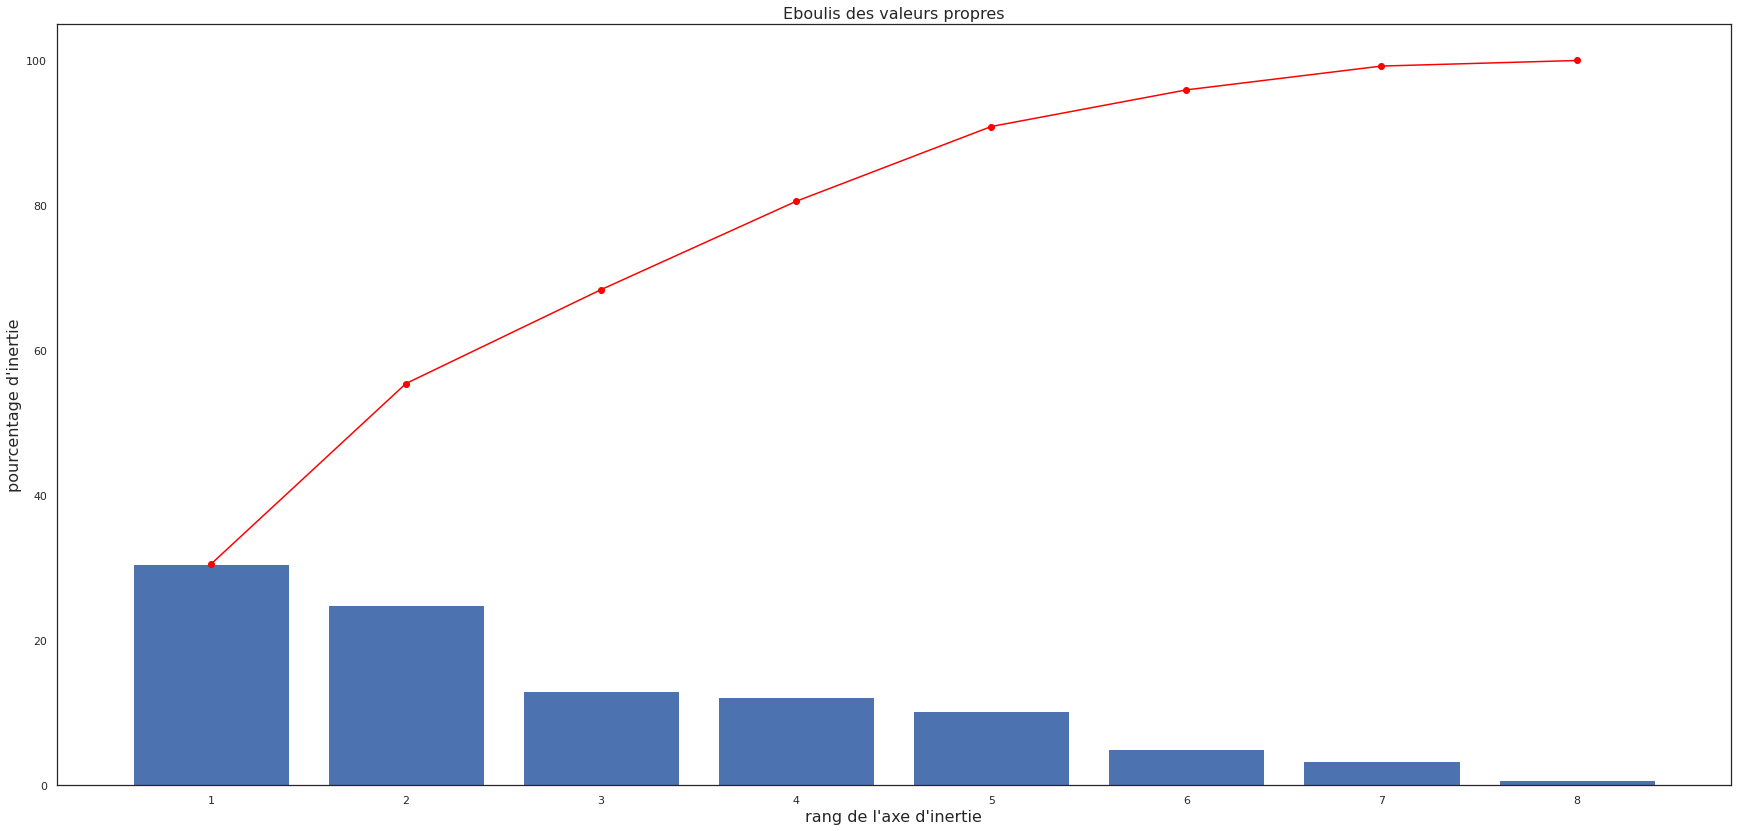

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 2160x1008 with 0 Axes>

In [ ]:
#Eboulis des valeurs propres
display_scree_plot(acp)
# Sauvegarde des graphiques
plt.savefig('eboulis.png')
files.download('eboulis.png')

Seules les composantes 1 à 3 présentent une proportion de l'inertie totale supérieure à 12.5% (100/8), donc qu'elle ont un intérêt représentatif supérieur aux variables initiales.

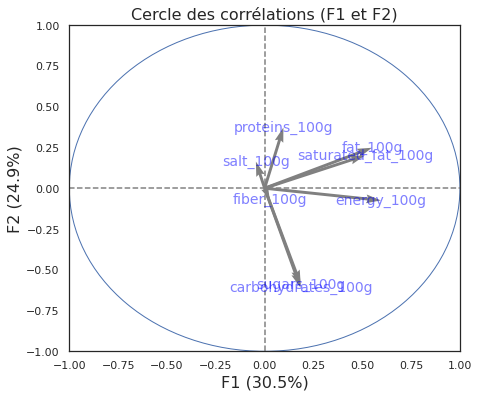

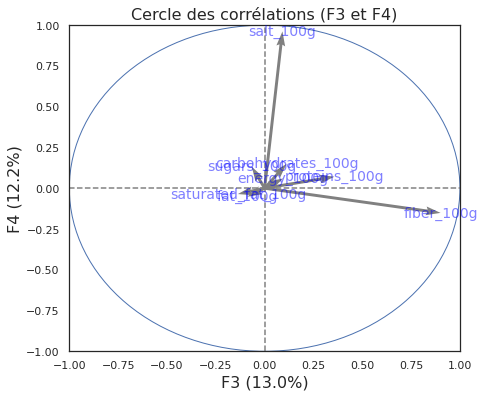

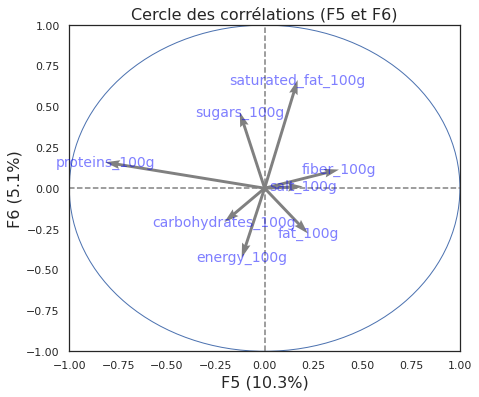

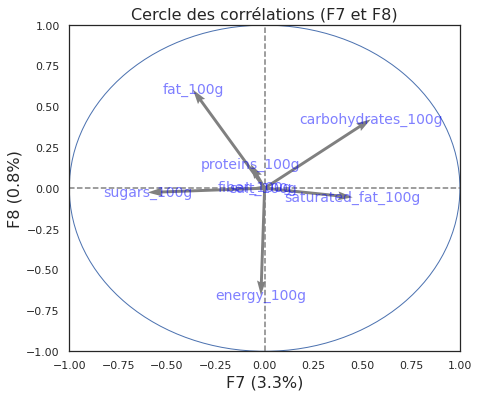

In [ ]:
# Cercle des corrélations
display_circles(acp.components_, acpComponent, acp, [(0,1),(2,3),(4,5),(6,7)], labels = np.array(dataAcp.columns))

Interprétations des composantes :

F1 : richesse des aliments (quantité d'énergie et taux de graisses)

F2 : richesse en glucide mais pas forcément énergétique

F3, F4 : Composantes essentiellement liées respectivement au sel et aux fibres, peu d'intérêt pour l'analyse.

F5,F6,F7,F8 : Composantes ne représentant pas les individus mieux que les variables intitiales.

Corrélation entre les variables initiales :
ce que l'on peut principalement remarquer sur ces graphiques c'est dans le deuxième, que le sel et les fibres sont indépendants.

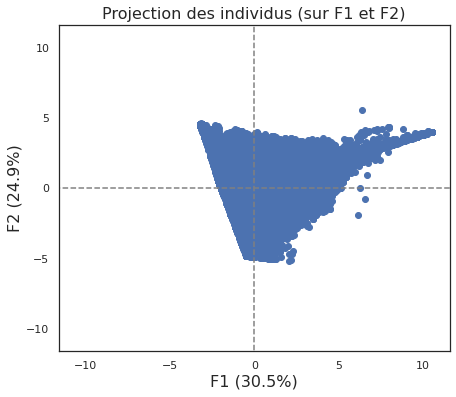

In [ ]:
# Projection des individus sur les composantes 1 et 2
XProjection = acp.transform(XScaled)
display_factorial_planes(XProjection, acpComponent, acp, [(0,1)])

Si l'on interprète le nuage de point par ses angles, on peut expliquer que les limites de notre échantillon d'aliments vont de :
- aliments de types glucidiques maigres et finalement peu énergétiques (angle supérieur gauche) (ex:fruits)
- les aliments riches en glucides, graisses et quantité d'énergie (angle supérieur droit) (ex : patîsseries)
- aliments moyennement riches mais peu glucidiques (ex : viandes)

## Conclusion sur l'ACP
La réduction de dimension par ACP peut permettre d'améliorer les temps de calcul, cependant, dans notre exemple, étant donné qu'il n'y a pas de corrélation franche entre les différentes variables, on ne peut pas réduire fortement la dimension sans perdre de nombreuses informations. Cela dit, les données quantitatives étudiées sont au nombre de 8, il n'est donc peut-être pas nécessaire de réduire la dimension pour acccélérer les calculs.

## Matrice des corrélations

In [12]:
#Affichage de la matrice de corrélation
dataAcp.corr().round(decimals=2)

energy_100g  fat_100g  ...  proteins_100g  salt_100g
energy_100g                1.00      0.76  ...           0.17      -0.05
fat_100g                   0.76      1.00  ...           0.12      -0.00
saturated_fat_100g         0.57      0.72  ...           0.14      -0.01
carbohydrates_100g         0.41     -0.12  ...          -0.24      -0.10
sugars_100g                0.29     -0.06  ...          -0.29      -0.11
fiber_100g                 0.07     -0.01  ...           0.03      -0.02
proteins_100g              0.17      0.12  ...           1.00       0.08
salt_100g                 -0.05     -0.00  ...           0.08       1.00

[8 rows x 8 columns]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

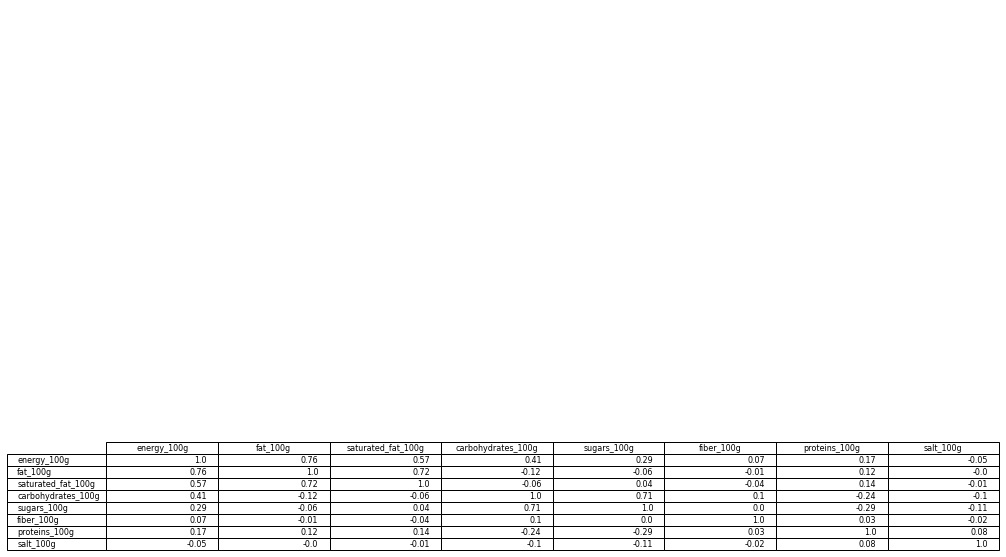

In [13]:
# Affichage sous forme de tableau à télécharger
plt.figure(figsize=(16,8))
plt.tight_layout()
# Pas d'axes
ax = plt.subplot(111, frame_on=False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
#Création du tableau
table(ax, dataAcp.corr().round(decimals=2))
#Sauvegarde
plt.savefig('corrTable.png', bbox_inches = 'tight')
#Téléchargement
files.download('corrTable.png')


On note que le sel est une variable indépendante, de même que les fibres (ce qui explique bien le deuxième cercle des corrélations de l'ACP).

Les protéines sont légèrement corrélées négativemens avec les glucides (dont les sucres).

Les sucres et les glucides sont fortement corrélés ce qui est assez logique, le deuxième étant en partie contenu dans le premier.

Les graisses et les graisses saturées sont également dans ce cas.

L'énergie est majoritairement corrélée avec les graisses et les glucides.


# Classification des aliments

Nous allons effectuer une classification des aliments au moyen de l'algorithme k-means, nous observerons ensuite la valeur centrale de cette classe pour déterminer comment l'application va utiliser un aliment de cette classe pour faire varier le score de l'utilisateur.

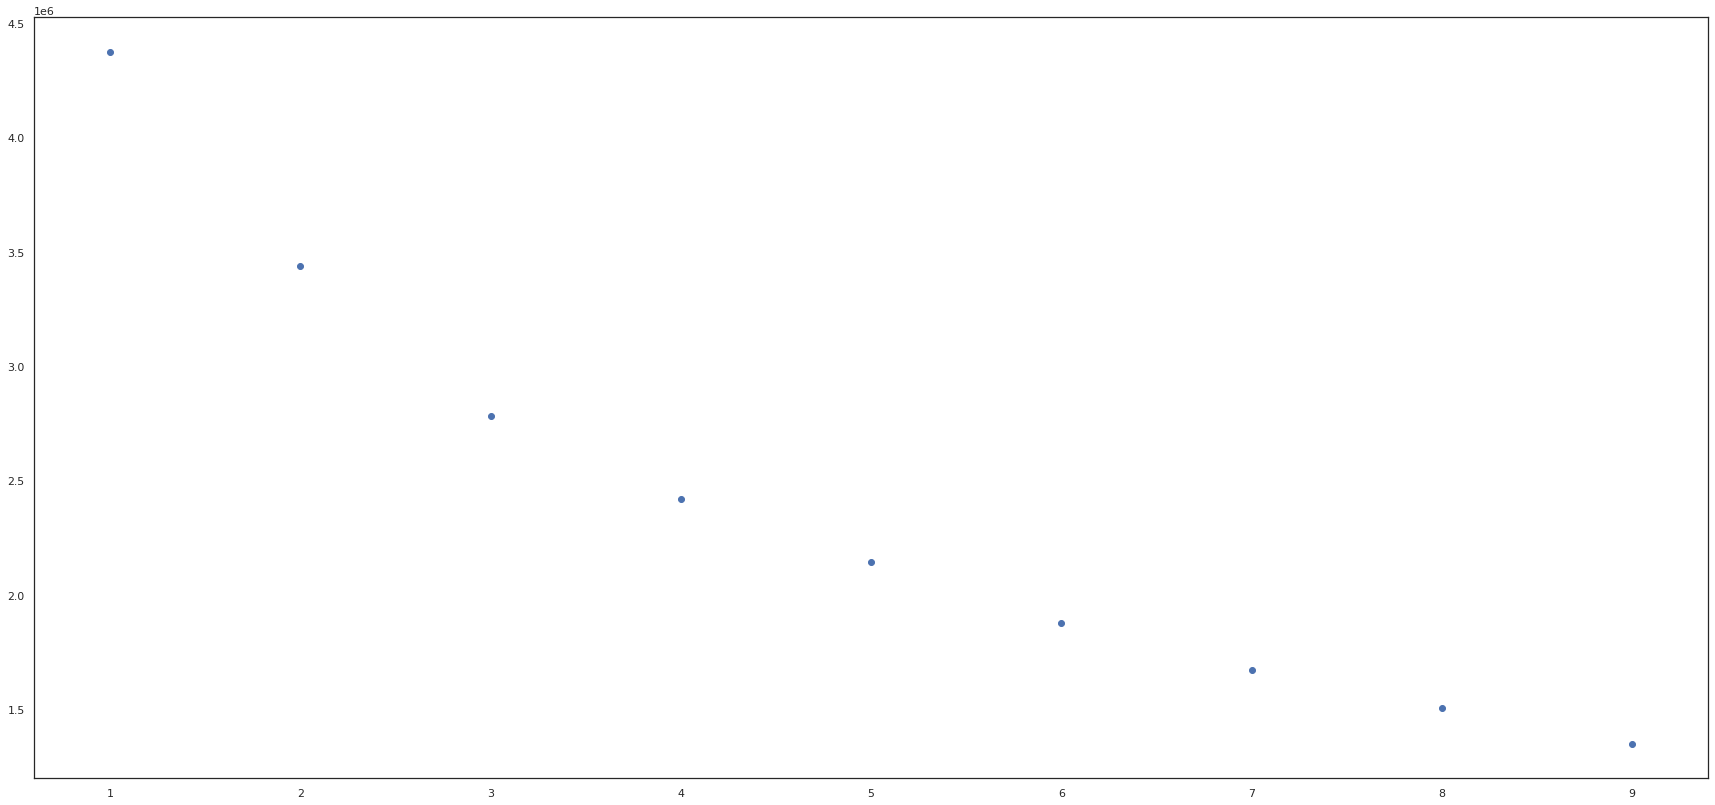

In [ ]:
# Nombre de clusters
nbClusters = 0
inertia=list()
nbList=list()

# Relève de l'inertie intraclasse
for i in range(0,9):
  nbClusters = 1+i
  kM = KMeans(n_clusters=nbClusters)
  kM.fit(XScaled)
  inertia.append(kM.inertia_)
  nbList.append(nbClusters)

plt.scatter(nbList,inertia)

On poeut voir un coude au niveau de la classification à 3 clusters mais c'est insuffisant pour notre analyse.

In [ ]:
# Nombre de clusters

nbClusters = 8


#Classification
kM = KMeans(n_clusters=nbClusters)
kM.fit(XScaled)

clusters = kM.labels_
centroids = kM.cluster_centers_

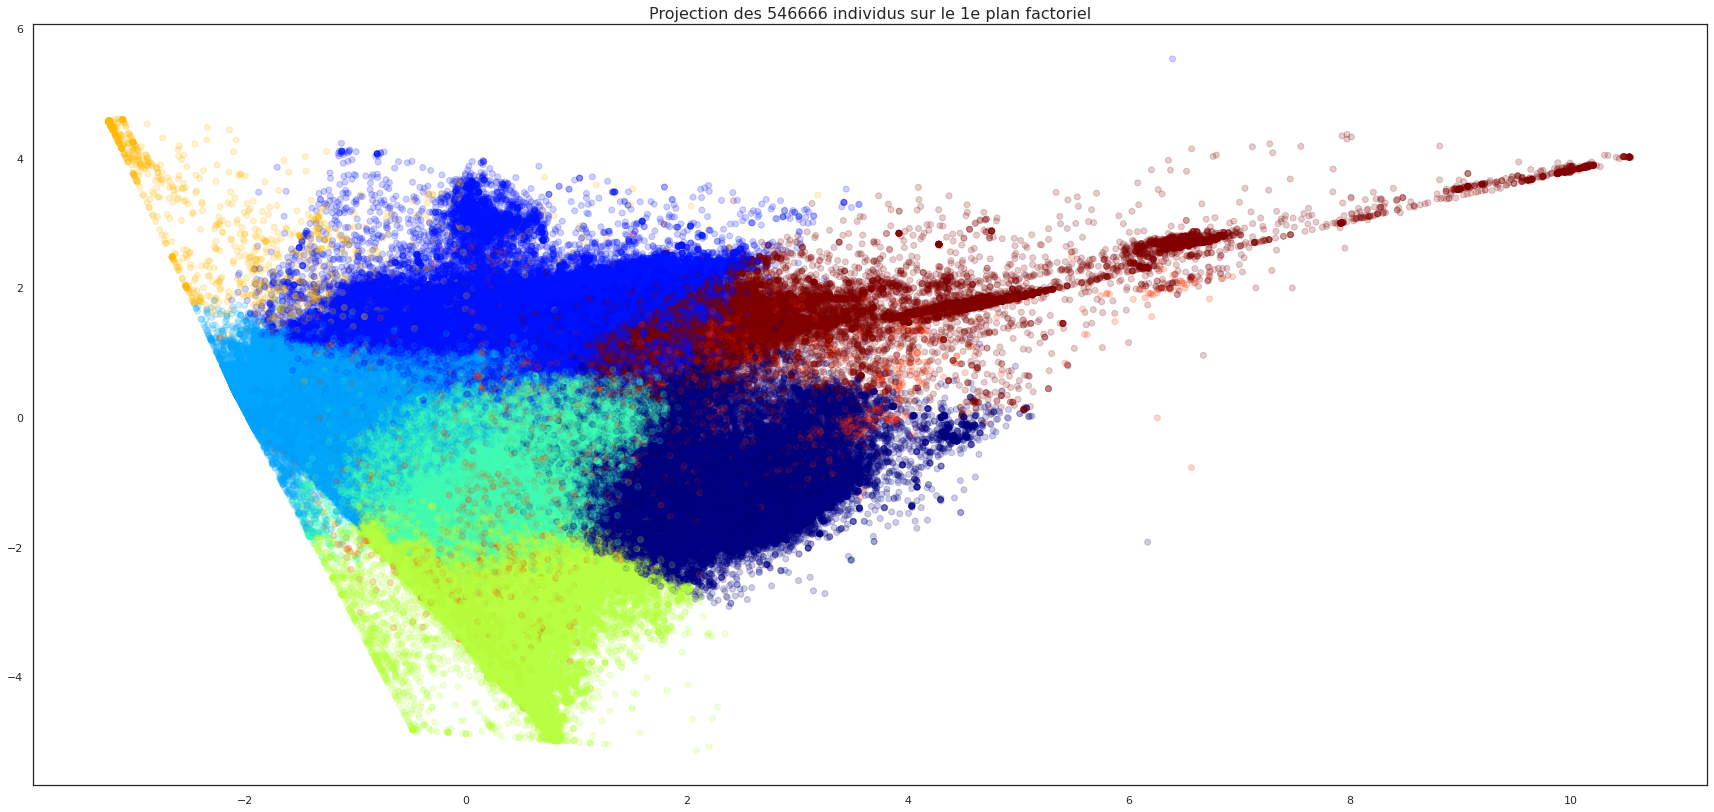

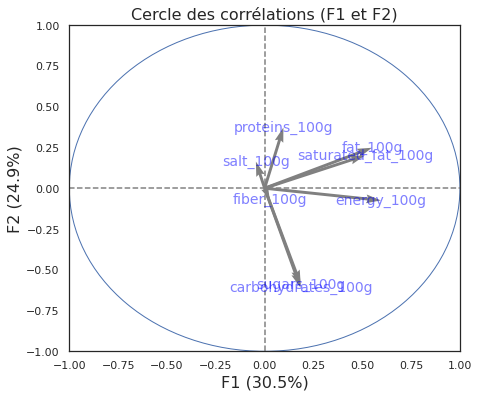

In [ ]:
pca = decomposition.PCA(n_components=6).fit(XScaled)
XProjection = pca.transform(XScaled)

# Affichage du graphique sur le premier plan factoriel
plt.scatter(XProjection[:, 0], XProjection[:, 1], c=clusters.astype(np.float), cmap = 'jet', alpha=.2)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(XProjection.shape[0]))
plt.show(block=False)
# Affichage des composantes correspondantes
display_circles(acp.components_, acpComponent, acp, [(0,1)], labels = np.array(dataAcp.columns))

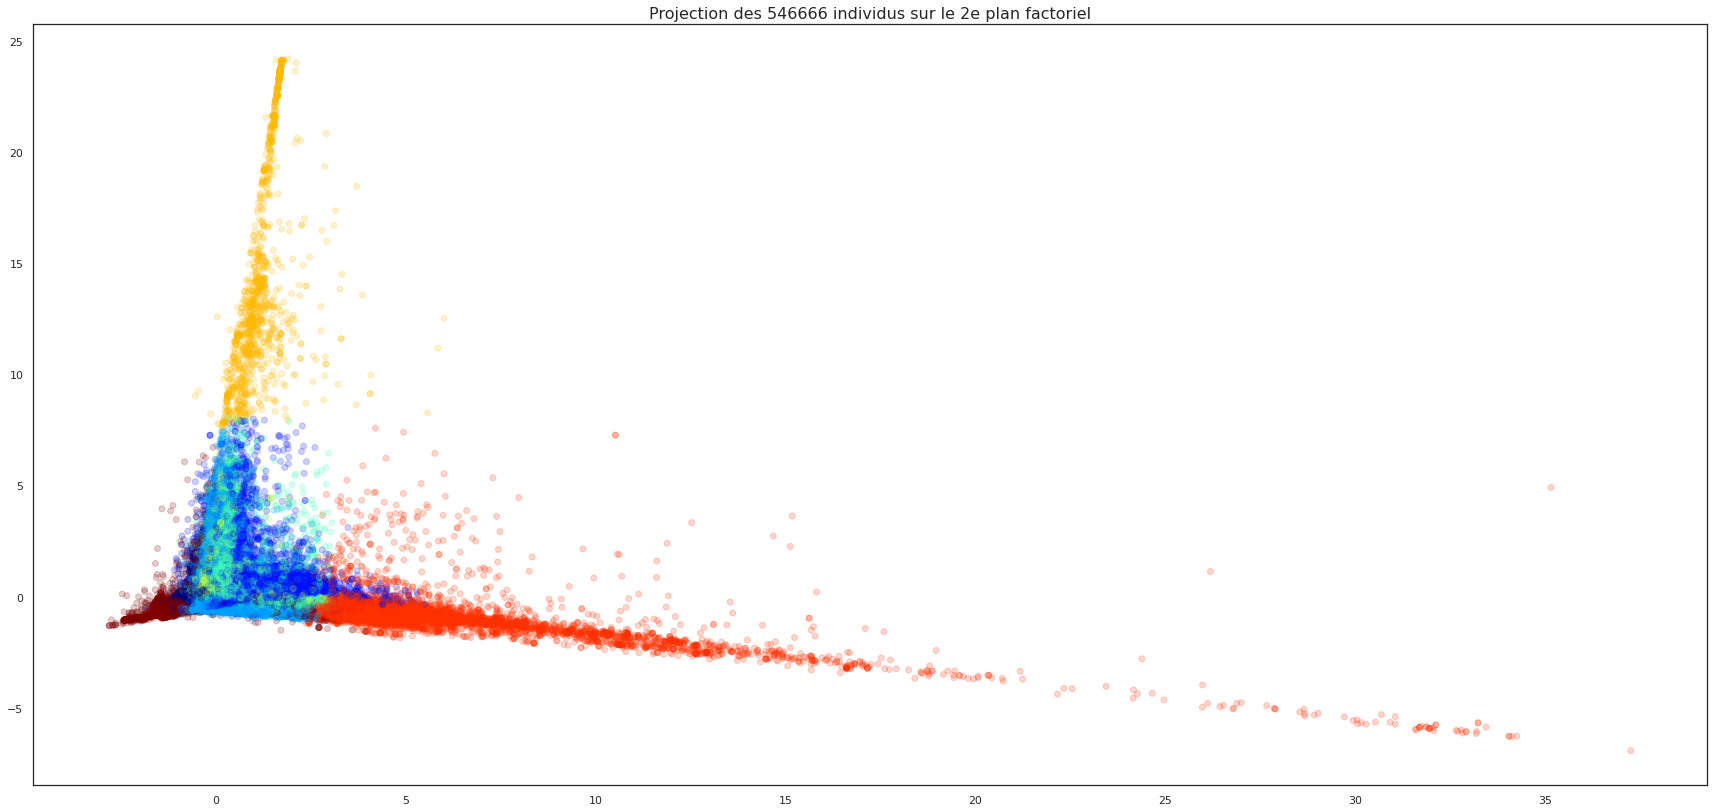

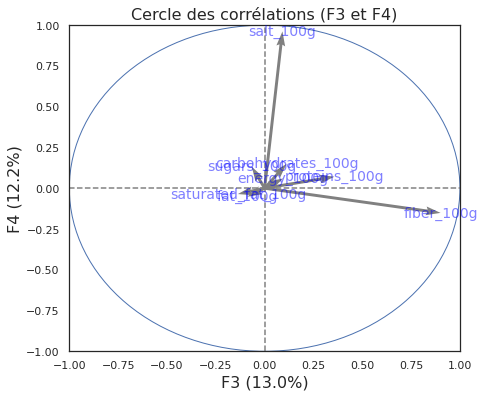

In [ ]:
# Affichage du graphique sur le deuxième plan factoriel
plt.scatter(XProjection[:, 2], XProjection[:, 3], c=clusters.astype(np.float), cmap = 'jet', alpha=.2)
plt.title("Projection des {} individus sur le 2e plan factoriel".format(XProjection.shape[0]))
plt.show(block=False)
# Affichage des composantes correspondantes
display_circles(acp.components_, acpComponent, acp, [(2,3)], labels = np.array(dataAcp.columns))

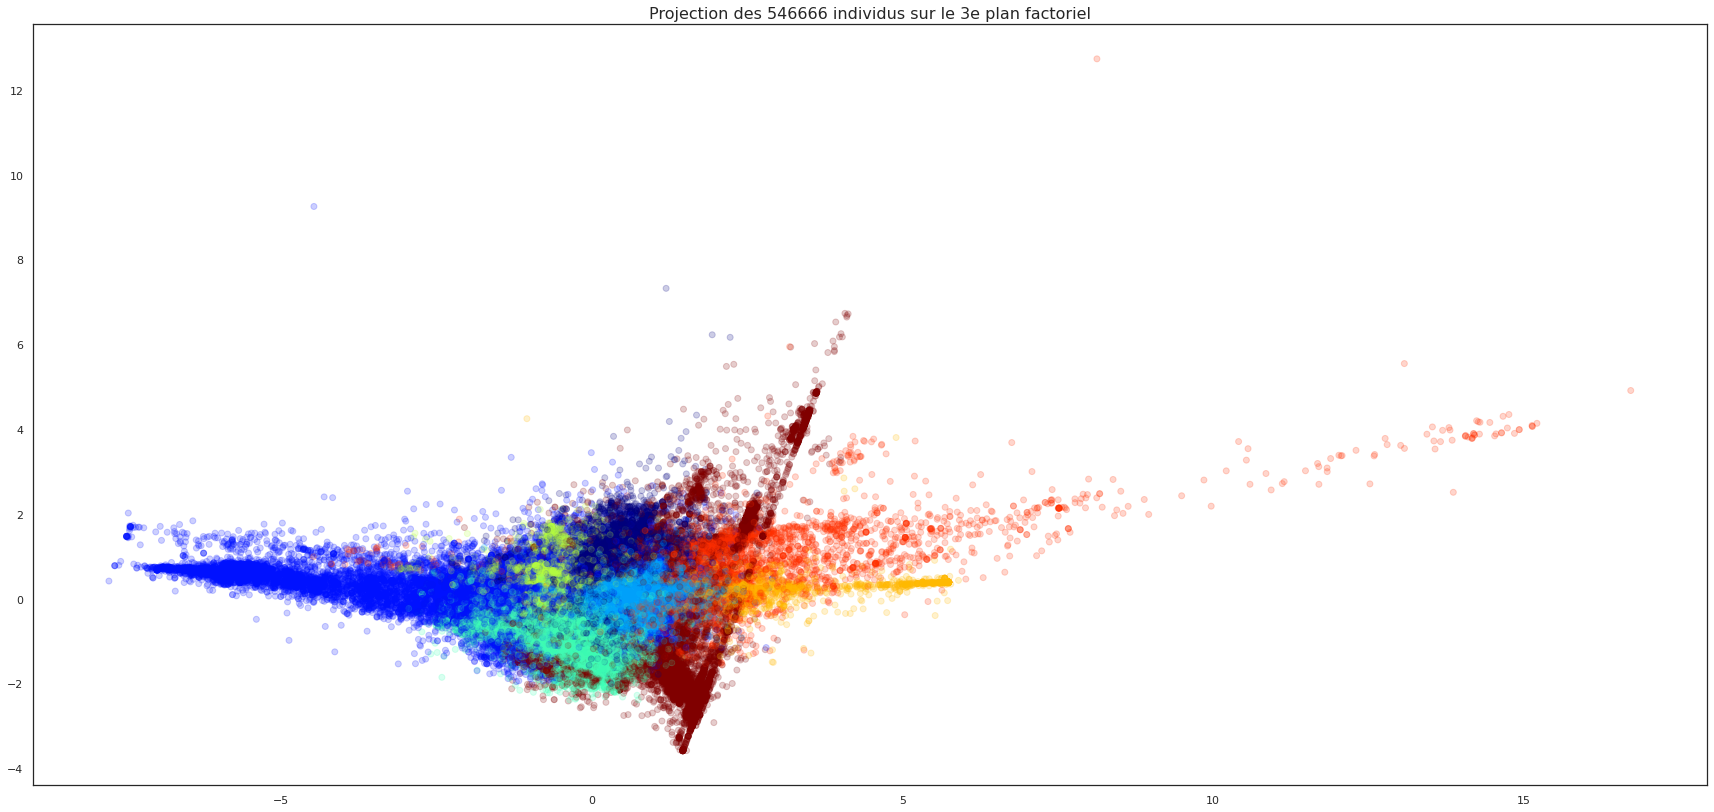

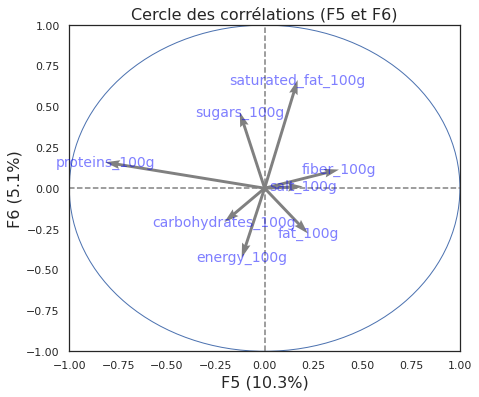

In [ ]:
# Affichage du graphique sur le troisième plan factoriel
plt.scatter(XProjection[:, 4], XProjection[:, 5], c=clusters.astype(np.float), cmap = 'jet', alpha=.2)
plt.title("Projection des {} individus sur le 3e plan factoriel".format(XProjection.shape[0]))
plt.show(block=False)
# Affichage des composantes correspondantes
display_circles(acp.components_, acpComponent, acp, [(4,5)], labels = np.array(dataAcp.columns))

Notation de 1 à 5: 1 à éviter, 5 à privilégier

Classe 7: Bordeaux : les lipides sont nécessaires à l'organisme, cette classe est donc nécessaire à une alimentation équilibrée mais à consommer avec modération Note : 2

Classe 5: Or : Peu d'intérêt nutritif pour trop de sel Note : 2

Classe 1: Bleu Royal : Protéiné et quantité modérée de graisses Note : 3

Classe 4: Bleu ciel : aliments peu gras, sucrés et moyens sur les autres nutriments (hors fibres) Note : 3

Classe 3: Turquoise : aliments moyens plus gras que la classe Vert clair mais moins sucrés Note :4

Classe 0: Bleu Marine : aliments riches en sucres ou graisses saturées Note :1

Classe 2: Vert clair : aliments très chargés en énergie (notamment liés aux glucides et sucres) Note 1 (note à relever pour les sportifs)

Classe 6: Orange: aliments riches en fibre, faibles en protéines et sel, Note : 5

# Vérification du nutriscore des classes

In [ ]:
# Transformation du classement en dataframe pour intégration dans le dataframe de travail
clustersDf = pd.DataFrame(clusters, columns=['classe'])
data2 = data.merge(clustersDf, how='inner', left_index=True, right_index=True)

In [ ]:
data2.head()

code                  product_name quantity  \
0  0000000000017              Vitória crackers      NaN   
1  0000000000100   moutarde au moût de raisin      100g   
2  0000000000123         Sauce Sweety chili 0%      NaN   
3  0000000000178                     Mini coco      NaN   
4   000000000080              Pur jus de pomme      NaN   

                                categories  \
0                                      NaN   
1  Epicerie, Condiments, Sauces, Moutardes   
2                                      NaN   
3                                      NaN   
4                                      NaN   

                                    categories_tags  additives_n  \
0                                               NaN          NaN   
1  en:groceries,en:condiments,en:sauces,en:mustards          0.0   
2                                               NaN          NaN   
3                                               NaN          NaN   
4                                               NaN          NaN   

   ingredients_from_palm_oil_n  ingredients_that_may_be_from_palm_oil_n  \
0                          NaN                                      NaN   
1                          0.0                                      0.0   
2                          NaN                                      NaN   
3                          NaN                                      NaN   
4                          NaN                                      NaN   

   nutriscore_score nutriscore_grade  nova_group   pnns_groups_1  \
0               NaN              NaN         NaN         unknown   
1              18.0                d         NaN  fat and sauces   
2               NaN              NaN         NaN         unknown   
3               NaN              NaN         NaN         unknown   
4               NaN              NaN         NaN         unknown   

          pnns_groups_2  ecoscore_score_fr ecoscore_grade_fr main_category  \
0               unknown                NaN               NaN           NaN   
1  dressings and sauces               60.0                 b   en:mustards   
2               unknown                NaN               NaN           NaN   
3               unknown                NaN               NaN           NaN   
4               unknown                NaN               NaN           NaN   

   energy_kcal_100g  energy_100g  fat_100g  saturated_fat_100g  \
0             375.0       1569.0       7.0                3.08   
1               NaN        936.0       8.2                2.20   
2              21.0         88.0       0.0                0.00   
3              60.0        251.0       3.0                1.00   
4              63.0        264.0       0.0                0.00   

   carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
0                70.1         15.0         0.0            7.8       1.40   
1                29.0         22.0         0.0            5.1       4.60   
2                 4.8          0.4         0.0            0.2       2.04   
3                10.0          3.0         0.0            2.0       1.15   
4                15.5         15.5         0.0            0.2       0.00   

   sodium_100g  nutrition_score_fr_100g  classe  
0        0.560                      NaN       3  
1        1.840                     18.0       2  
2        0.816                      NaN       2  
3        0.460                      NaN       2  
4        0.000                      NaN       2

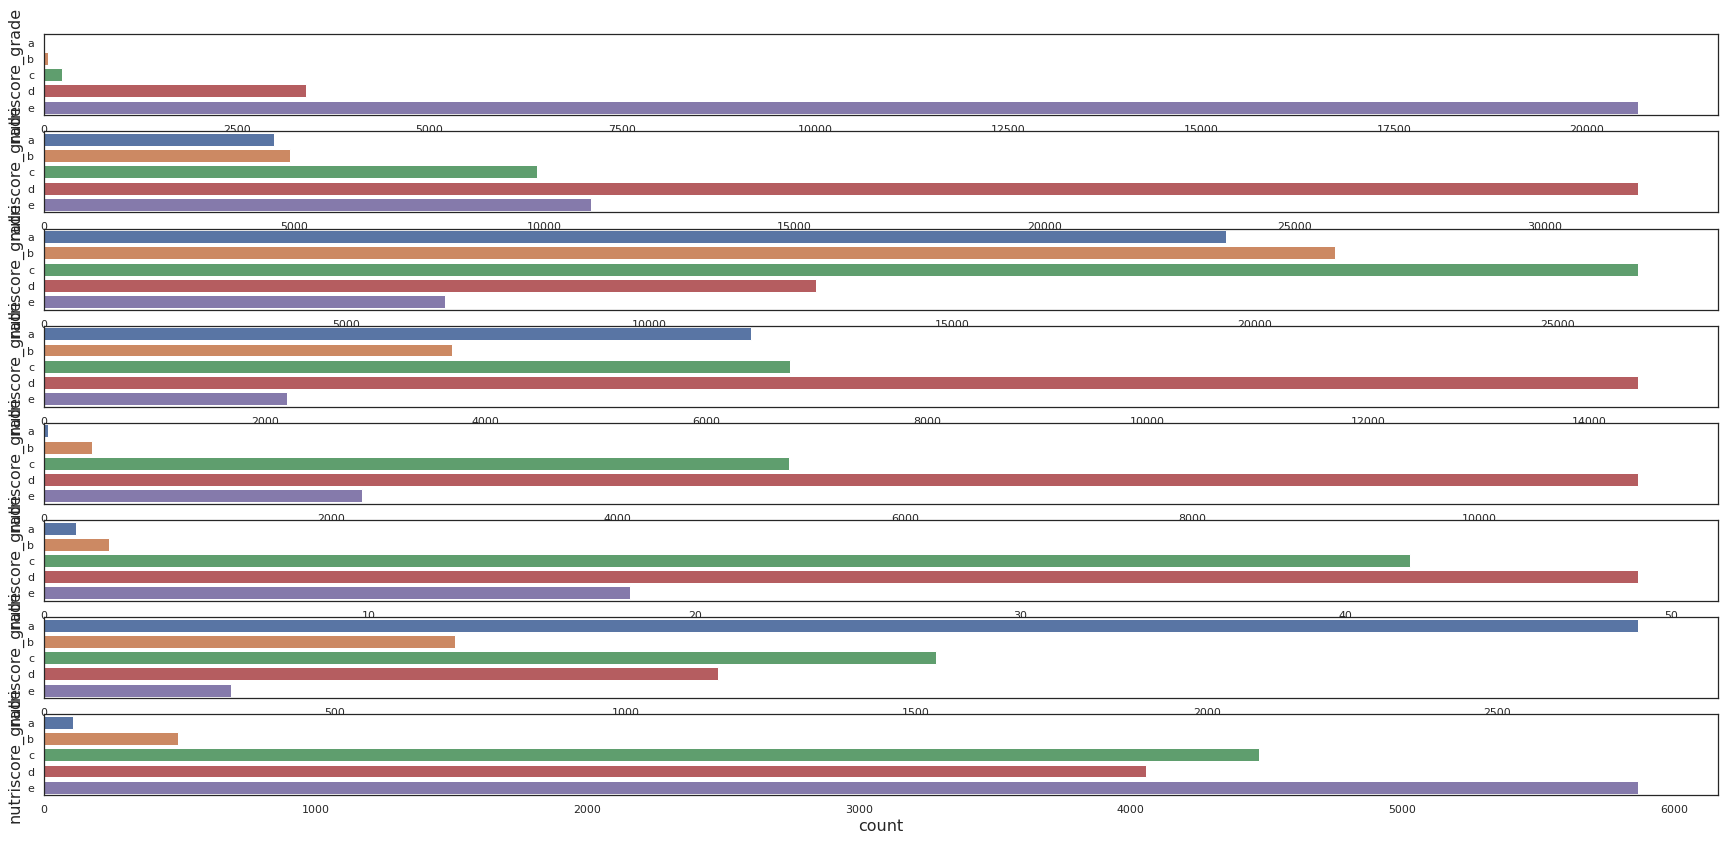

In [ ]:
# Affichage de la répartition des nutriscores par classes
for i in range(0,nbClusters):
  strToTest = str(f'classe=={i}')
  dataClass = data2.query(strToTest)
  plt.subplot(nbClusters,1,i+1)
  sns.countplot(y=dataClass['nutriscore_grade'], order=['a','b','c','d','e'])


In [ ]:
#Sauvegarde du df avec la classification
#with open('/gdrive/My Drive/Data/dataP3Class.csv', 'w') as f:
#  data2.to_csv(f, index=False)

In [ ]:
#Chargement du df avec la classification
data2 = pd.read_csv('/gdrive/My Drive/Data/dataP3Class.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Classe 0 : Nutriscore E pour Note donnée par l'analyse 1

Classe 1 : Nutriscore D pour Note donnée par l'analyse 3

Classe 2 : Nutriscore D pour Note donnée par l'analyse 1

Classe 3 : Nutriscore C/B/A pour Note donnée par l'analyse 4

Classe 4 : Nutriscore D pour Note donnée par l'analyse 3

Classe 5 : Nutriscore D/C pour Note donnée par l'analyse 2

Classe 6 : Nutriscore A pour Note donnée par l'analyse 5

Classe 7 : Nutriscore E/C pour Note donnée par l'analyse 2

On constate une cohérence plutôt bonne entre les notes que nous avons donné et les nutriscores les plus rencontrées dans les classes. La seule incohérence se trouve sur la classe 6 qui est mieux valorisée par le nutriscore.

# L'application : principe de calcul du score

Lorsque l'utilisateur entre les aliments qu'il consomme, la classe des aliments est relevée et les classes présentant la même note sont rassemblées puis une comptabilité du nombre d'occurence de chaque note est faite. Si l'aliment n'est pas inclus dans le jeu de données, l'utilisateur peut entrer les caractéristiques nutritives pour que sa classe soit calculées par rapport à sa distance avec les centroïdes des classes.

## Exemple à partir d'une alimentation sélectionnée aléatoirement

In [ ]:
#Exemple d'alimentation hebdomadaire
diet = data2.sample(n=100)

#Répartition des aliments
count = diet.value_counts(subset='classe')

#Correspondance classe/note
marks = {'mark': [1,3,1,4,3,2,5,2]}

marksDf = pd.DataFrame(marks, columns = ['mark'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


([<matplotlib.patches.Wedge at 0x7f29adee3590>,
 [Text(0.10351914875166042, 1.0951181606757014, '1'),
  Text(-1.099457216628753, -0.03455182778023783, '2'),
  Text(-0.5299290758070114, -0.9639373291943449, '3'),
  Text(0.8251221330042983, -0.7274431012982646, '4'),
  Text(1.095118155223859, -0.10351920642611424, '5')])

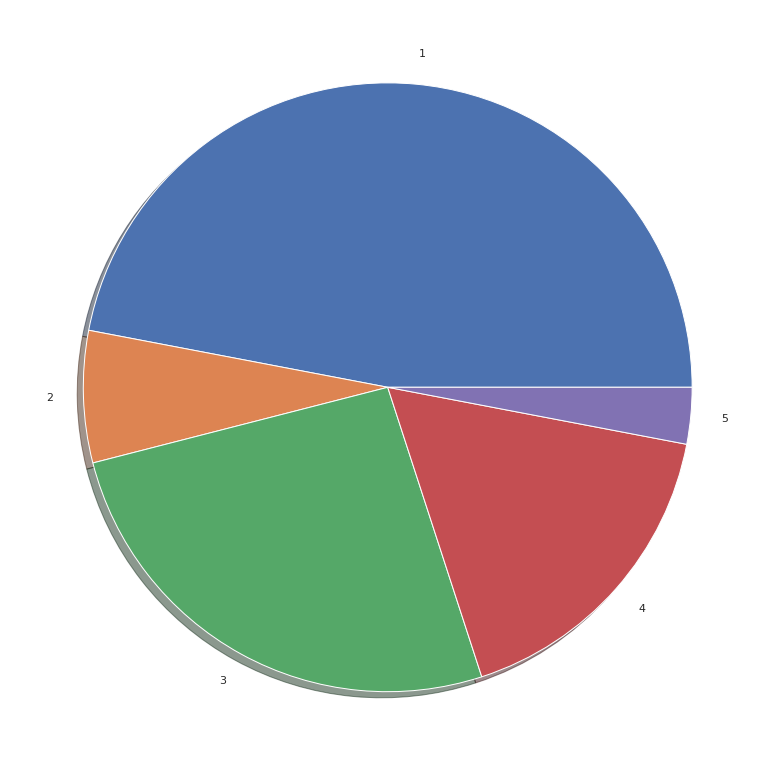

In [ ]:
countDf = count.to_frame(name='Quantity')
countMark = countDf.merge(marksDf, how='inner', left_index=True, right_index=True)
table = countMark.groupby(by='mark').sum()
plt.pie(table, labels=table.index, shadow=True)

On va ensuite calculer le ratio que prends chaque note d'aliment dans le total et on lui ajoute une variable calculée à partir de l'activité physique saisie par l'utilisateur (durée et intensité, là aussi, il conviendra de faire une classification à partir de données de dépense énergétique)

Ce ratio d'alimentation et d'activité physique est ensuite comparé à celui de la semaine passée, à celui du mois précédent et à l'objectif fixé par l'utilisateur avec calcul d'un indice de progression. L'application l'encourage alors à redoubler d'efforts ou le félicite.


## Test de stabilité de la classification

Pour vérifier la stabilité de la classification, on va la comparer avec une nouvelle classification réalisée à partir d'un échantillon réduit.

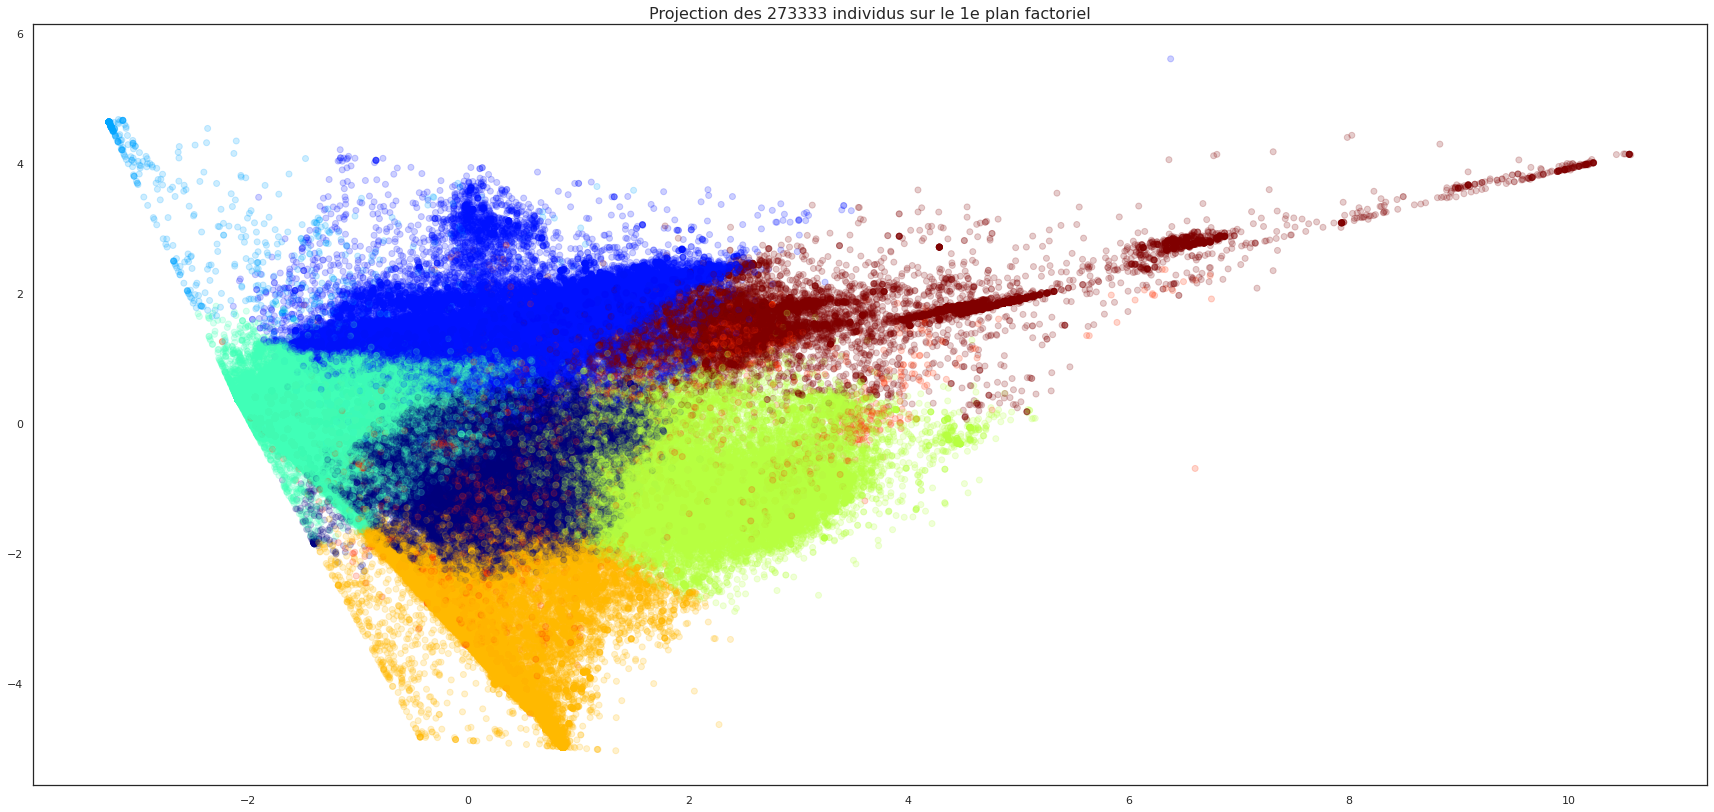

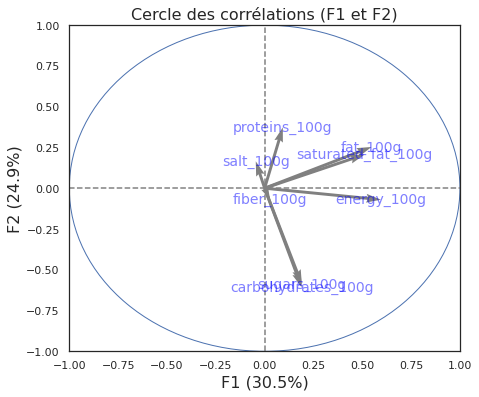

In [ ]:
# Réduction de la taille de l'échantillon
dataReduc = data.sample(n=int(data2.shape[0]/2))
dataReducAcp = dataReduc[dataReduc.columns[range(17,25)]]

# Remplissage des valeurs manquantes par la moyenne
dataReducAcp = dataReducAcp.fillna(dataReducAcp.mean())

# Conversion en type array en séparant les noms des variables et l'index des produits
XReduc = dataReducAcp.values
# Centrage et réduction des données
XReducScaled = preprocessing.StandardScaler().fit_transform(XReduc)

# Initialisation d'un objet de type PCA
acpReduc = decomposition.PCA(n_components=acpComponent)
acpReduc.fit(XReducScaled)

#Classification
kMReduc = KMeans(n_clusters=nbClusters)
kMReduc.fit(XReducScaled)

clustersReduc = kMReduc.labels_
centroidsReduc = kMReduc.cluster_centers_

# Affichage du graphique sur le premier plan factoriel
plt.scatter(XReducProjection[:, 0], XReducProjection[:, 1], c=clustersReduc.astype(np.float), cmap = 'jet', alpha=.2)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(XReducProjection.shape[0]))
plt.show(block=False)
display_circles(acpReduc.components_, acpComponent, acpReduc, [(0,1)], labels = np.array(dataReducAcp.columns))


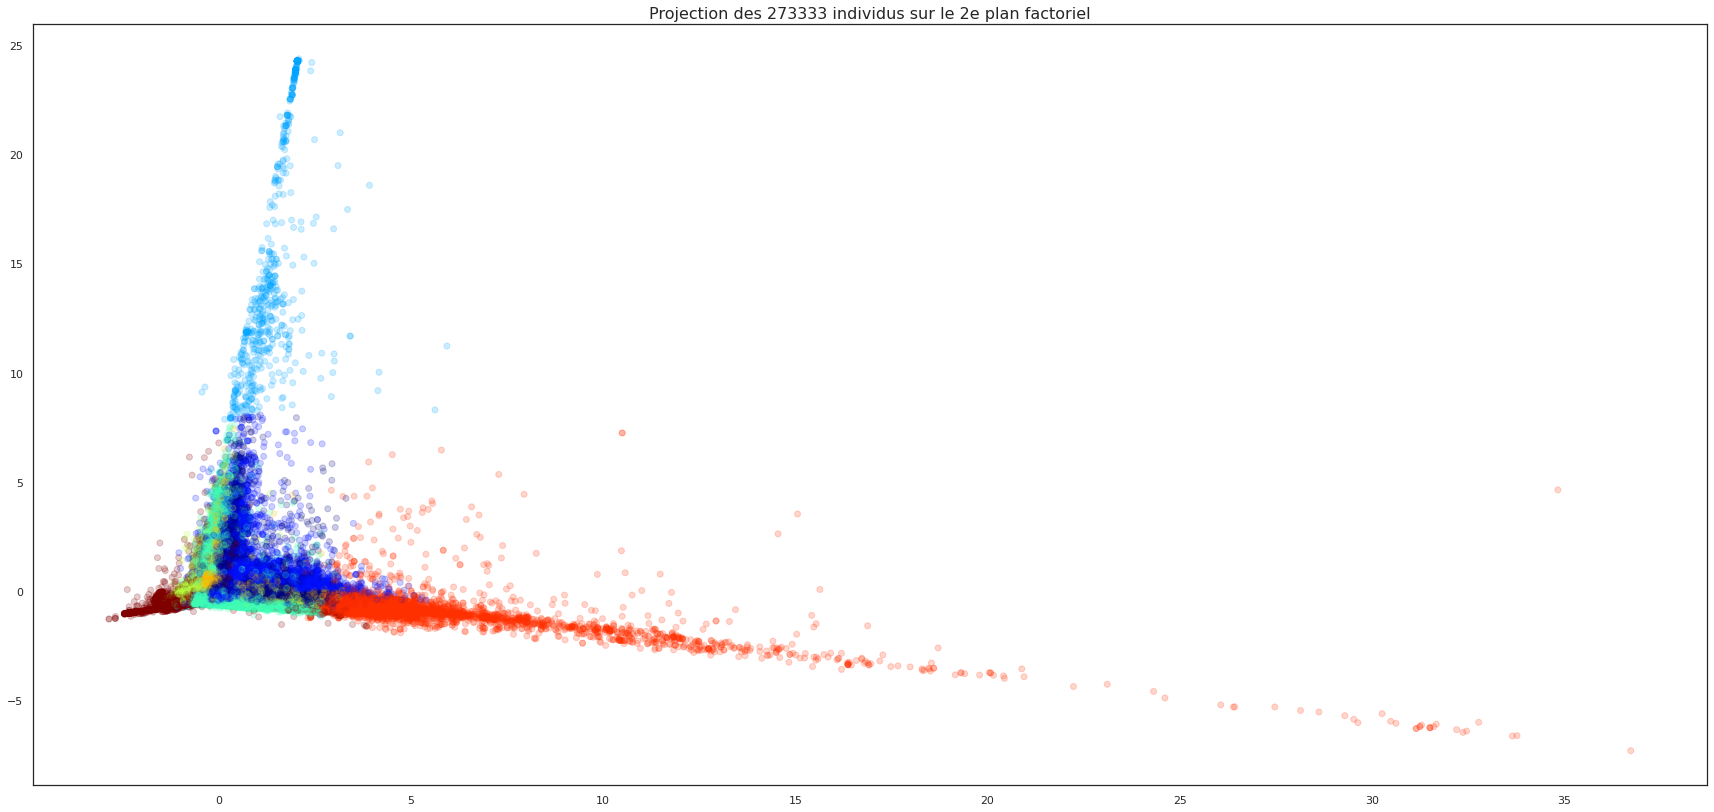

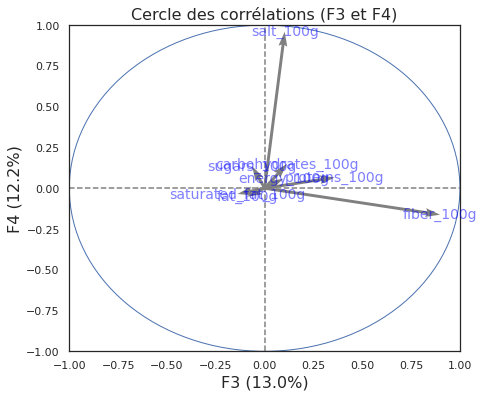

In [ ]:
# Affichage du graphique sur le deuxième plan factoriel
plt.scatter(XReducProjection[:, 2], XReducProjection[:, 3], c=clustersReduc.astype(np.float), cmap = 'jet', alpha=.2)
plt.title("Projection des {} individus sur le 2e plan factoriel".format(XReducProjection.shape[0]))
plt.show(block=False)
display_circles(acpReduc.components_, acpComponent, acpReduc, [(2,3)], labels = np.array(dataReducAcp.columns))

On distingue bien les mêmes séparations entre les groupes. Même avec deux fois moins de données, on a une classification stable.

## Test de stabilité de la classification face à l'augmentation du nombre de variable

Et si à l'avenir, on souhaite rajouter une variable, la classification sera t'elle toujours stable ?

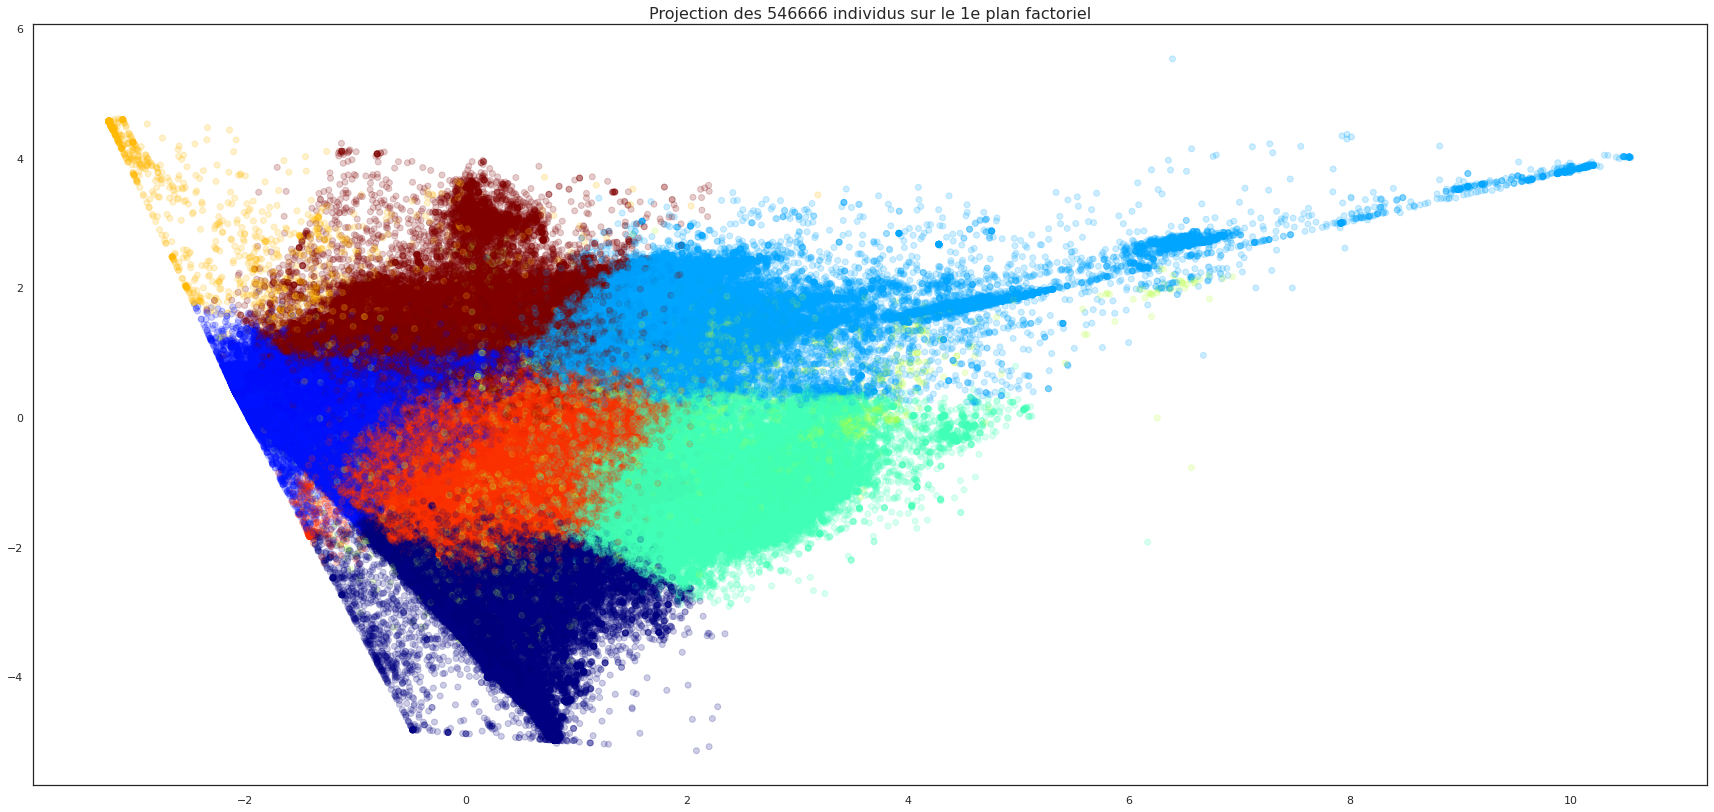

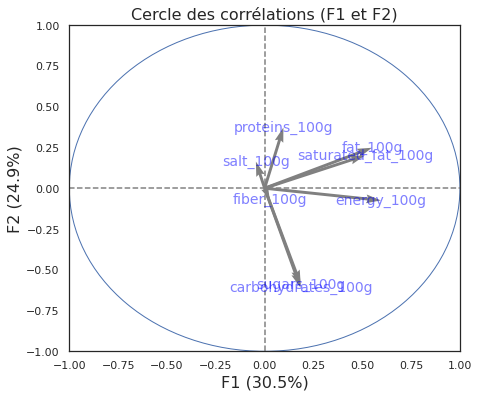

In [ ]:
# Ajout de la variable Ecoscore
#Création de la liste des variables de classi
listVar = data.columns[range(17,25)].to_list()
listVar.append(data.columns[13])
dataAltAcp = data[listVar]

# Remplissage des valeurs manquantes par la moyenne
dataAltAcp = dataAltAcp.fillna(dataAltAcp.mean())

# Conversion en type array en séparant les noms des variables et l'index des produits
XAlt = dataAltAcp.values
# Centrage et réduction des données
XAltScaled = preprocessing.StandardScaler().fit_transform(XAlt)

#Classification
kMAlt = KMeans(n_clusters=nbClusters)
kMAlt.fit(XAltScaled)

clustersAlt = kMAlt.labels_
centroidsAlt = kMAlt.cluster_centers_

# Affichage du graphique sur le premier plan factoriel
plt.scatter(XProjection[:, 0], XProjection[:, 1], c=clustersAlt.astype(np.float), cmap = 'jet', alpha=.2)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(XProjection.shape[0]))
plt.show(block=False)
display_circles(acp.components_, acpComponent, acp, [(0,1)], labels = np.array(dataAcp.columns))

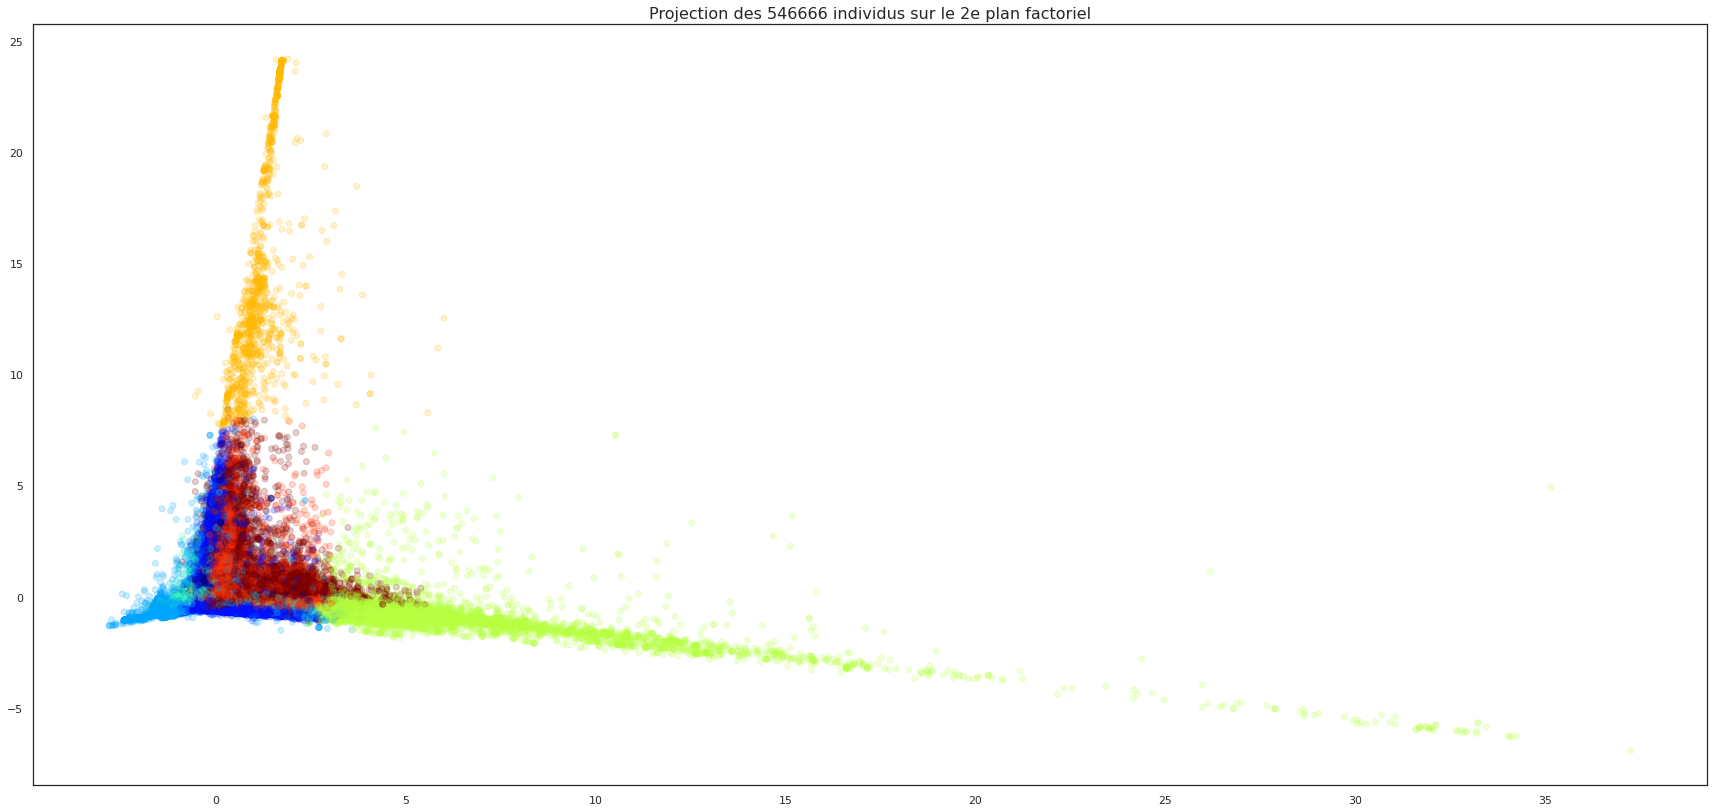

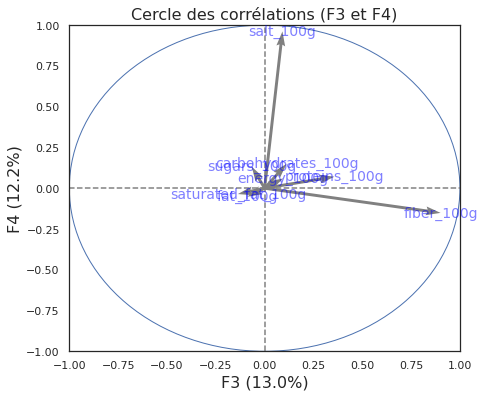

In [ ]:
# Affichage du graphique sur le deuxième plan factoriel
plt.scatter(XProjection[:, 2], XProjection[:, 3], c=clustersAlt.astype(np.float), cmap = 'jet', alpha=.2)
plt.title("Projection des {} individus sur le 2e plan factoriel".format(XProjection.shape[0]))
plt.show(block=False)
display_circles(acp.components_, acpComponent, acp, [(2,3)], labels = np.array(dataAltAcp.columns))

Pour faciliter la comparaison, on a conservé les même composantes que pour la classification initiale dans les axes des graphiques. On constate que la répartition des classes a peu évolué. Notre classification est plutôt stable en cas d'ajout d'une seule variable.

## Perspectives

On peut augmenter la quantité de classes pour offrir une vision plus précise et en les analysant avec l'aide de nutritionistes qui définiront leur note. Puis en adaptant la note de chaque classe d'aliment à des profils type d'utilisateur faisant eux même l'objet d'une classification en fonction de critères pertinents (âge, sexe, activité physique, localisation, poids, objectifs, etc...)

## Conclusion
Le système est stable face au retrait d'individus et peut supporter l'ajout de variables si une nouvelle analyse des nutritionnistes est faite. Le système peu s'adapter aux produits manquants et à l'ajout de produits puisqu'il suffit de déterminer leur classe en fonction de leurs nutriments. En revanche, il ne permet pas de situer des aliments qui n'auraient pas les 8 variables de base correctement remplies.

Bien que les modifications mineures du jeu de données ne nécessitent pas de faire une nouvelle classification, chaque modification majeure du système demande une nouvelle classification et donc une nouvelle analyse de la part des nutritionnistes.